# **Understanding Problem Statement**



### **Problem Statement:**

The used car market is influenced by a range of factors, making it challenging for sellers to set competitive and fair prices. The core question for this project is: **"What are the primary factors influencing the price of used cars, and how can understanding these factors help in better pricing strategies?"**

The used car market in India is a dynamic and ever-changing landscape. Prices can fluctuate wildly based on a variety of factors including the make and model of the car, its mileage, its condition and the current market conditions. As a result, it can be difficult for sellers to accurately price their cars.

In [ ]:

import kagglehub
manishkr1754_cardekho_used_car_data_path = kagglehub.dataset_download('manishkr1754/cardekho-used-car-data')

print('Data source import complete.')


100%|██████████| 230k/230k [00:00<00:00, 26.1MB/s]

Extracting files...
Data source import complete.


# **Process Flow of Project**


1. Understanding Problem Statement
2. Getting System Ready
3. Data Collection
4. Understanding the Data-Data Eyeballing & Data Description
5. Data Cleaning & Preprocessing I
6. Exploratory Data Analysis (EDA)
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis
7. Data Cleaning & Preprocessing II
8. Insights from Data Visualization
9. Feature Engineerig
10. Model Buidling & Evaluation
11. Selection of Best Model & Hyperparameter Tuninng
12. Generating Pickle file

# **Getting System Ready**

### Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

# **Data Collection**

The data for the model is already scrapped and available on a GitHub repo. We can directly download the data from the repo and use it to train the model.

### Download and Import the CSV Data as Pandas DataFrame

In [ ]:
import os

download_dir = "./data/"

download_url = "https://raw.githubusercontent.com/manishkr1754/CarDekho_Used_Car_Price_Prediction/main/notebooks/data/cardekho_dataset.csv"

os.makedirs(download_dir,exist_ok=True)

filename = os.path.basename(download_url)

download_file_path = os.path.join(download_dir, filename)

urllib.request.urlretrieve(download_url, download_file_path)

print('-'*100)
print('Data with name ' + filename + ' Downloaded at ' + download_file_path)
print('-'*100)

df = pd.read_csv(download_file_path, index_col=[0])

----------------------------------------------------------------------------------------------------
Data with name cardekho_dataset.csv Downloaded at ./data/cardekho_dataset.csv
----------------------------------------------------------------------------------------------------


# **Understanding the Data**

In [ ]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
df.info(7)

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [ ]:
print('The size of Dataframe is: ', df.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
df.info()
print('-'*100)

The size of Dataframe is:  (15411, 13)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price    

## **Numerical and categorical columns are**

In [ ]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


### **Data Decritption(Feature Information)**

* **car_name:** Car's Full name, which includes brand and specific model name.
* **brand:** Brand Name of the particular car.
* **model:** Exact model name of the car of a particular brand.
* **seller_type:** Which Type of seller is selling the used car
* **fuel_type:** Fuel used in the used car, which was put up on sale.
* **transmission_type:** Transmission used in the used car, which was put on sale.
* **vehicle_age:** The count of years since car was bought.
* **mileage:** It is the number of kilometer the car runs per litre.
* **engine:** It is the engine capacity in cc(cubic centimeters)
* **max_power:** Max power it produces in BHP.
* **seats:** Total number of seats in car.
* **selling_price:** The sale price which was put up on website.

In [ ]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0
engine,0,0.0


## **Summary Statics of Numerical Features**

After inspecting the dataframe, **no missing values** found.

## **Summary Statics of Numerical Features**


In [ ]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
df.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


## **Summary statics for categorical features**

In [ ]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
print('-'*100)
df.describe(include= 'object')

Summary Statistics of categorical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [ ]:
print('-'*125)
print('Checking records for mis-spell, typo-error etc.')
print('-'*125)

print("'car_name' variable have {} unique category : \n{}\n".format(df['car_name'].nunique(), df['car_name'].unique()))
print('-'*125)

print("'brand' variable have {} unique category : \n{}\n".format(df['brand'].nunique(), df['brand'].unique()))
print('-'*125)

print("'model' variable have {} unique category : \n{}\n".format(df['model'].nunique(), df['model'].unique()))
print('-'*125)

print("'seller_type' variable have {} unique category : \n{}\n".format(df['seller_type'].nunique(), df['seller_type'].unique()))
print('-'*125)

print("'fuel_type' variable have {} unique category : \n{}\n".format(df['fuel_type'].nunique(), df['fuel_type'].unique()))
print('-'*125)

print("'transmission_type' variable have {} unique category : \n{}\n".format(df['transmission_type'].nunique(), df['transmission_type'].unique()))
print('-'*125)

-----------------------------------------------------------------------------------------------------------------------------
Checking records for mis-spell, typo-error etc.
-----------------------------------------------------------------------------------------------------------------------------
'car_name' variable have 121 unique category : 
['Maruti Alto' 'Hyundai Grand' 'Hyundai i20' 'Ford Ecosport'
 'Maruti Wagon R' 'Hyundai i10' 'Hyundai Venue' 'Maruti Swift'
 'Hyundai Verna' 'Renault Duster' 'Mini Cooper' 'Maruti Ciaz'
 'Mercedes-Benz C-Class' 'Toyota Innova' 'Maruti Baleno'
 'Maruti Swift Dzire' 'Volkswagen Vento' 'Hyundai Creta' 'Honda City'
 'Mahindra Bolero' 'Toyota Fortuner' 'Renault KWID' 'Honda Amaze'
 'Hyundai Santro' 'Mahindra XUV500' 'Mahindra KUV100' 'Maruti Ignis'
 'Datsun RediGO' 'Mahindra Scorpio' 'Mahindra Marazzo' 'Ford Aspire'
 'Ford Figo' 'Maruti Vitara' 'Tata Tiago' 'Volkswagen Polo' 'Kia Seltos'
 'Maruti Celerio' 'Datsun GO' 'BMW 5' 'Honda CR-V' 'Ford Endea

## **Percentage of each category**

In [ ]:
print('-'*100)
print('The percentage of each category in categorical column are as follow : ')
print('-'*100 +'\n')
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('-'*100)

----------------------------------------------------------------------------------------------------
The percentage of each category in categorical column are as follow : 
----------------------------------------------------------------------------------------------------

car_name
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: proportion, Length: 121, dtype: float64
----------------------------------------------------------------------------------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW    

# **5) Data Cleaning & Preprocessing I**

Not required as of now

# 6) **Exploratory Data Analysis**

## **5.1 Univariate Analysis**

### **Numerical Features**

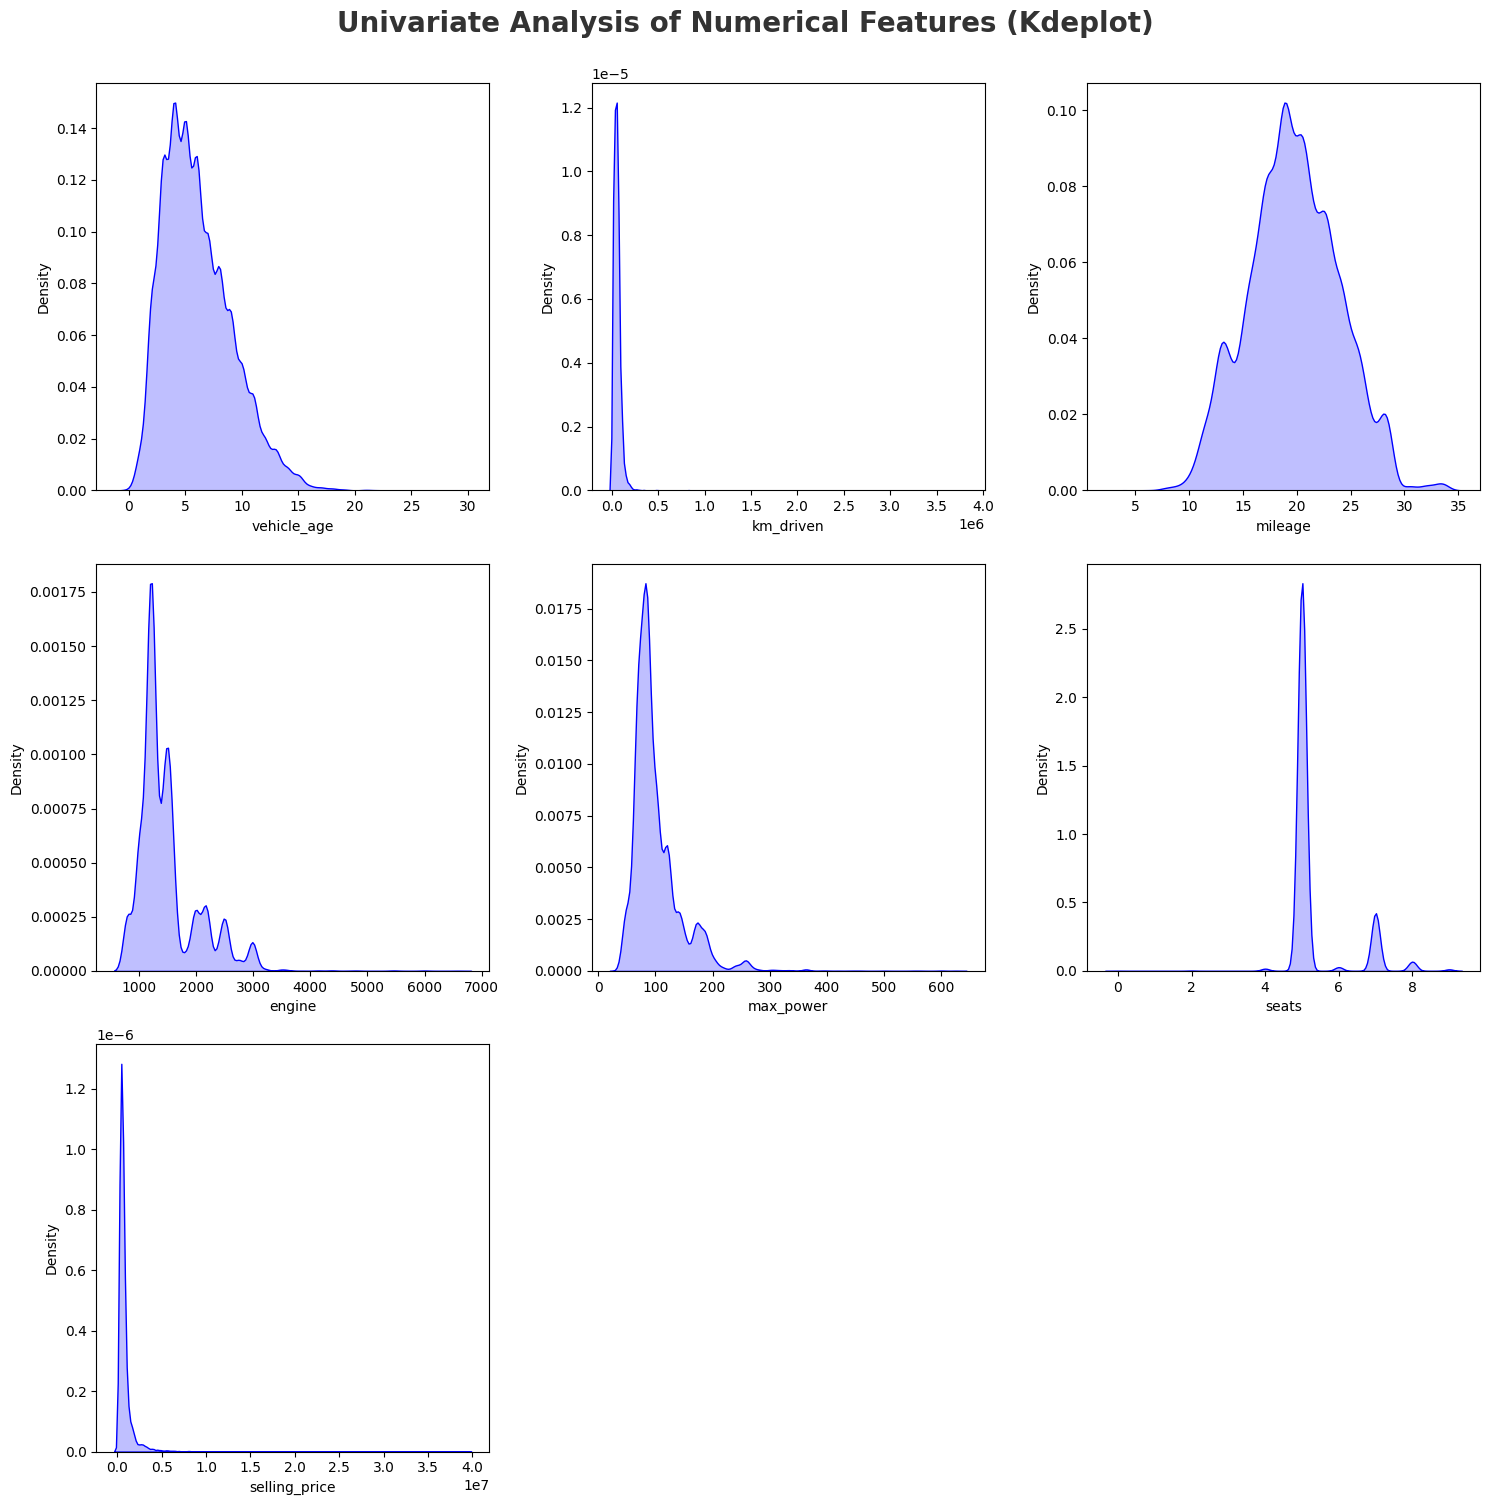

In [ ]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features (Kdeplot)', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

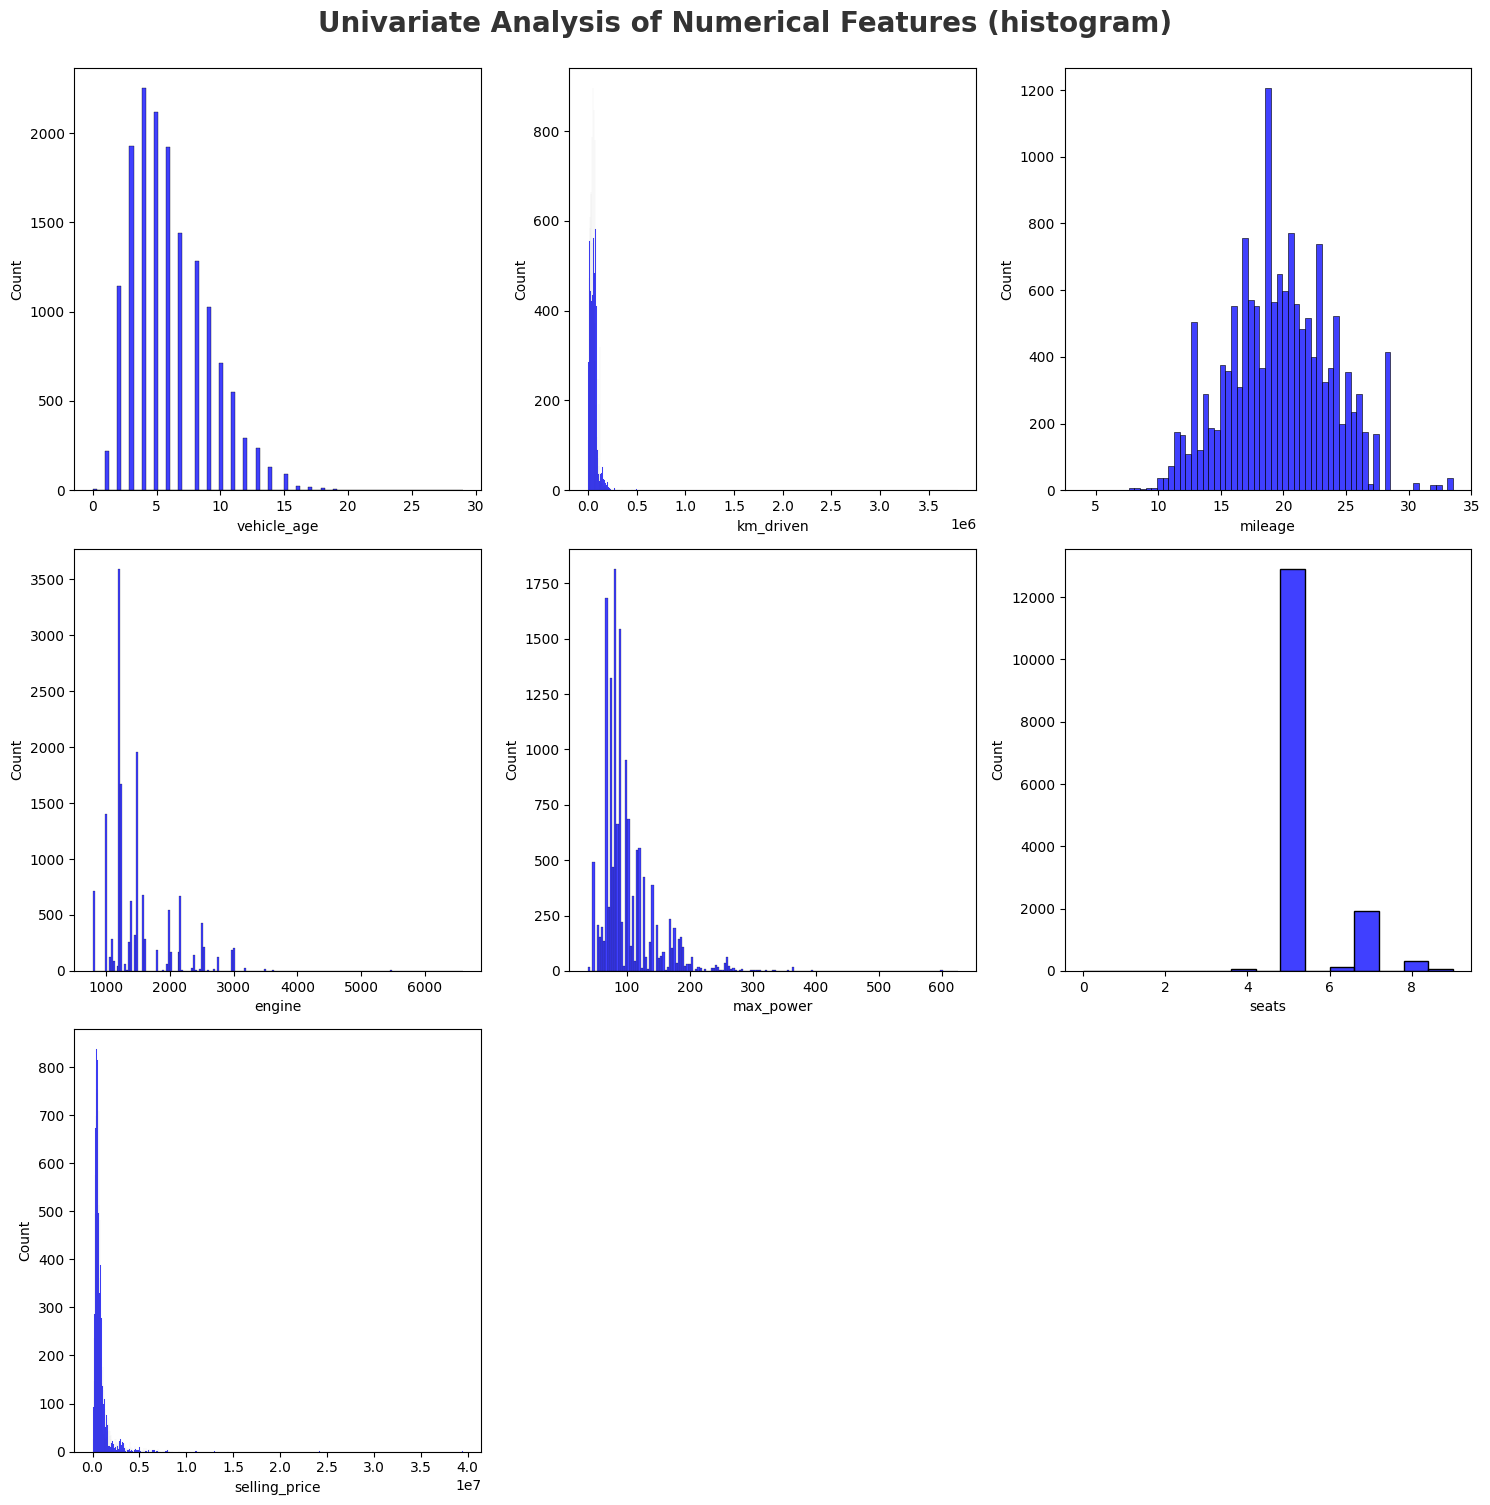

In [ ]:

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features (histogram)', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)  # Adjust the grid size if necessary depending on the number of numeric features
    sns.histplot(df[numeric_features[i]], kde=False, color='b')  # 'kde=False' turns off the KDE curve overlay
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


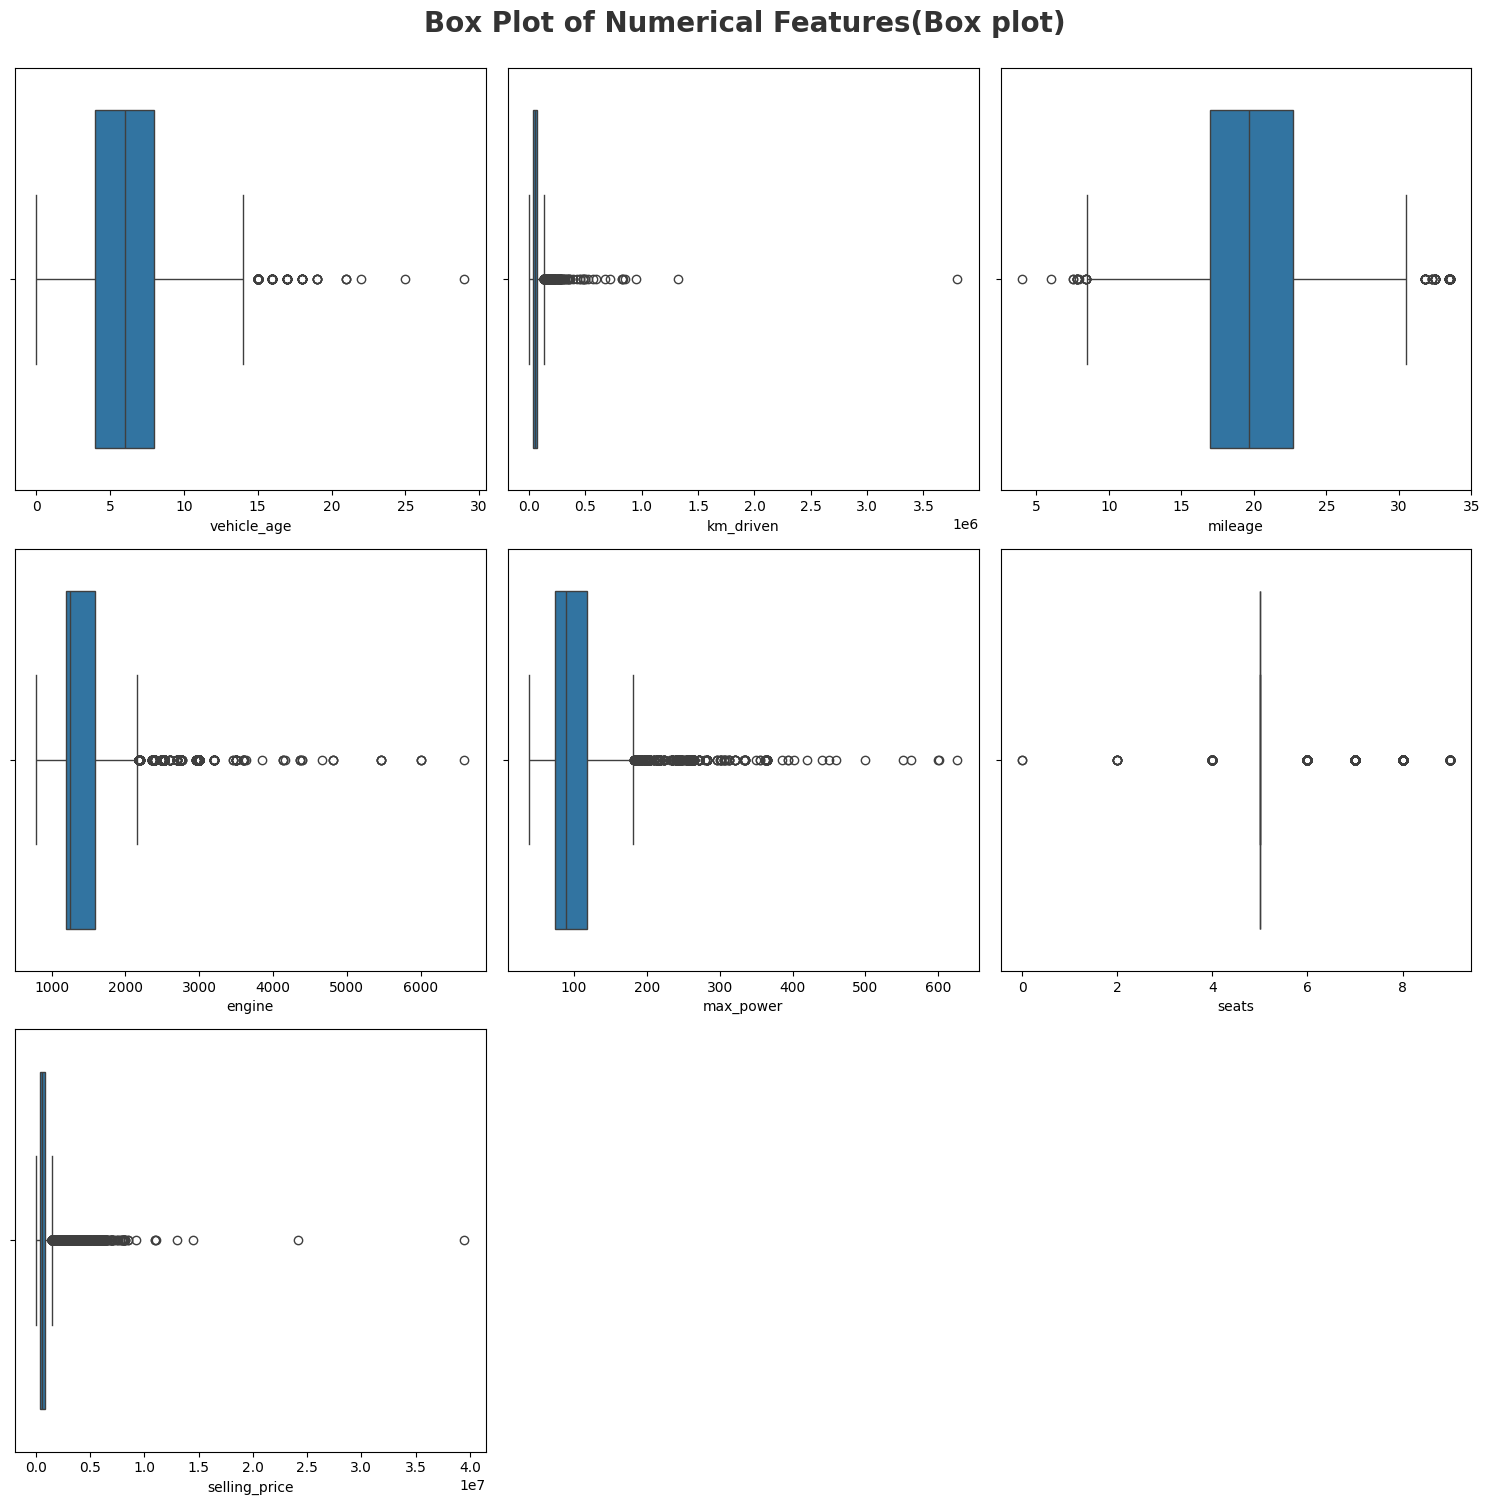

In [ ]:
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot of Numerical Features(Box plot)', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### **Report**
- Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
- Outliers in km_driven, enginer, selling_price, and max power.

## **Univariate analysis of categorical features**

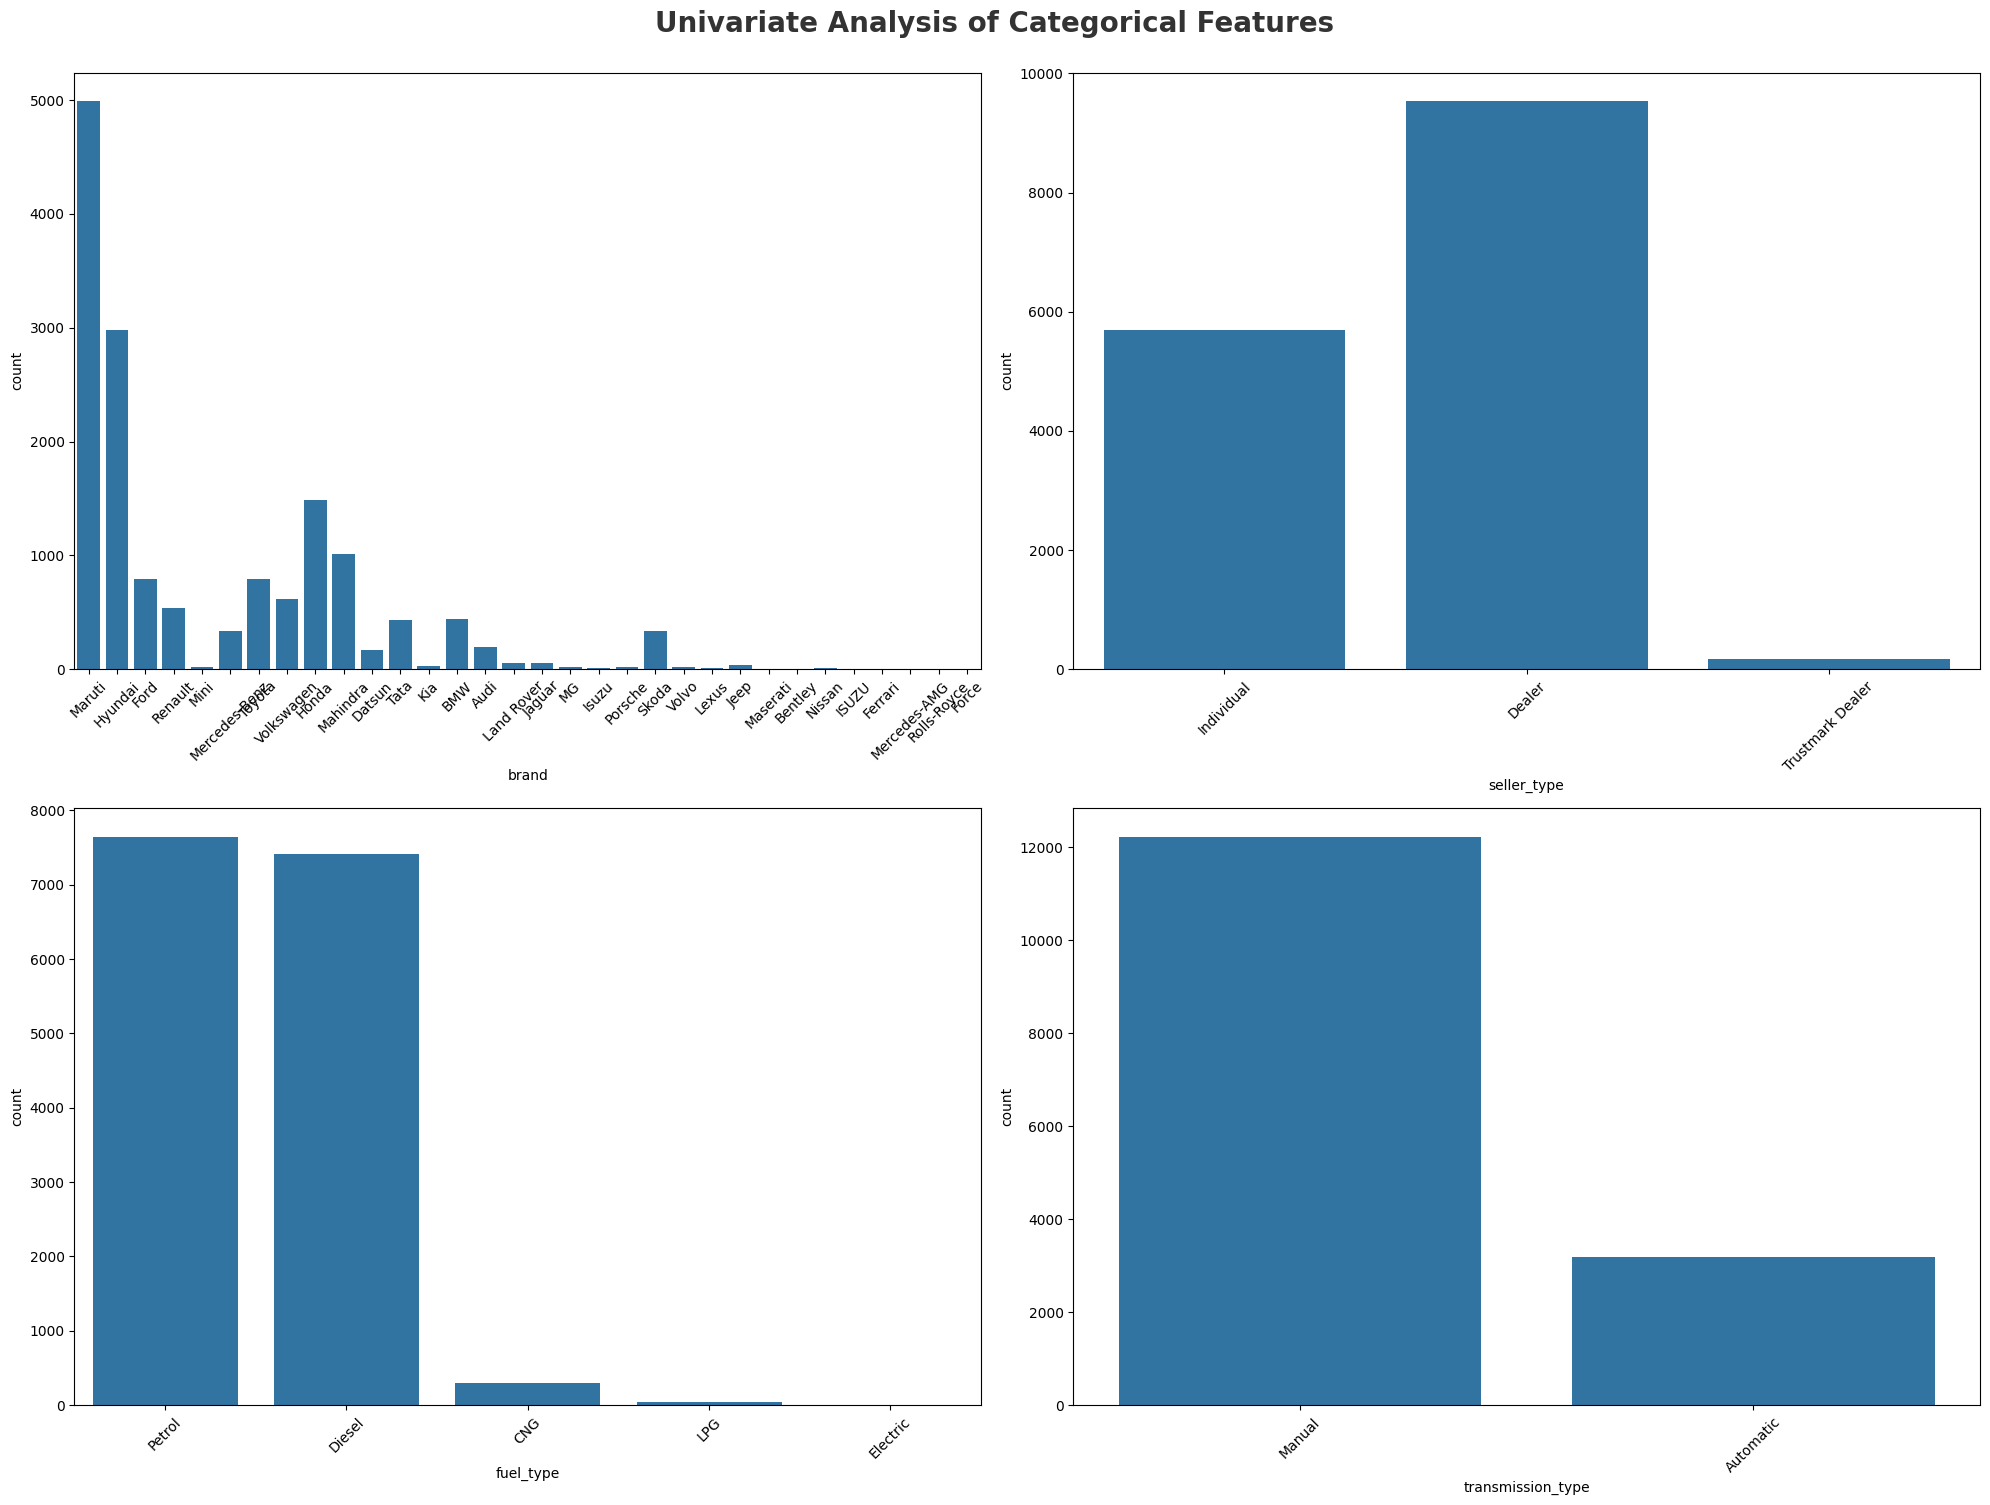

In [ ]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# **5.2 Bivariate Analysis**

In [ ]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continuos features:',continuous_features)

Num of continuos features: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


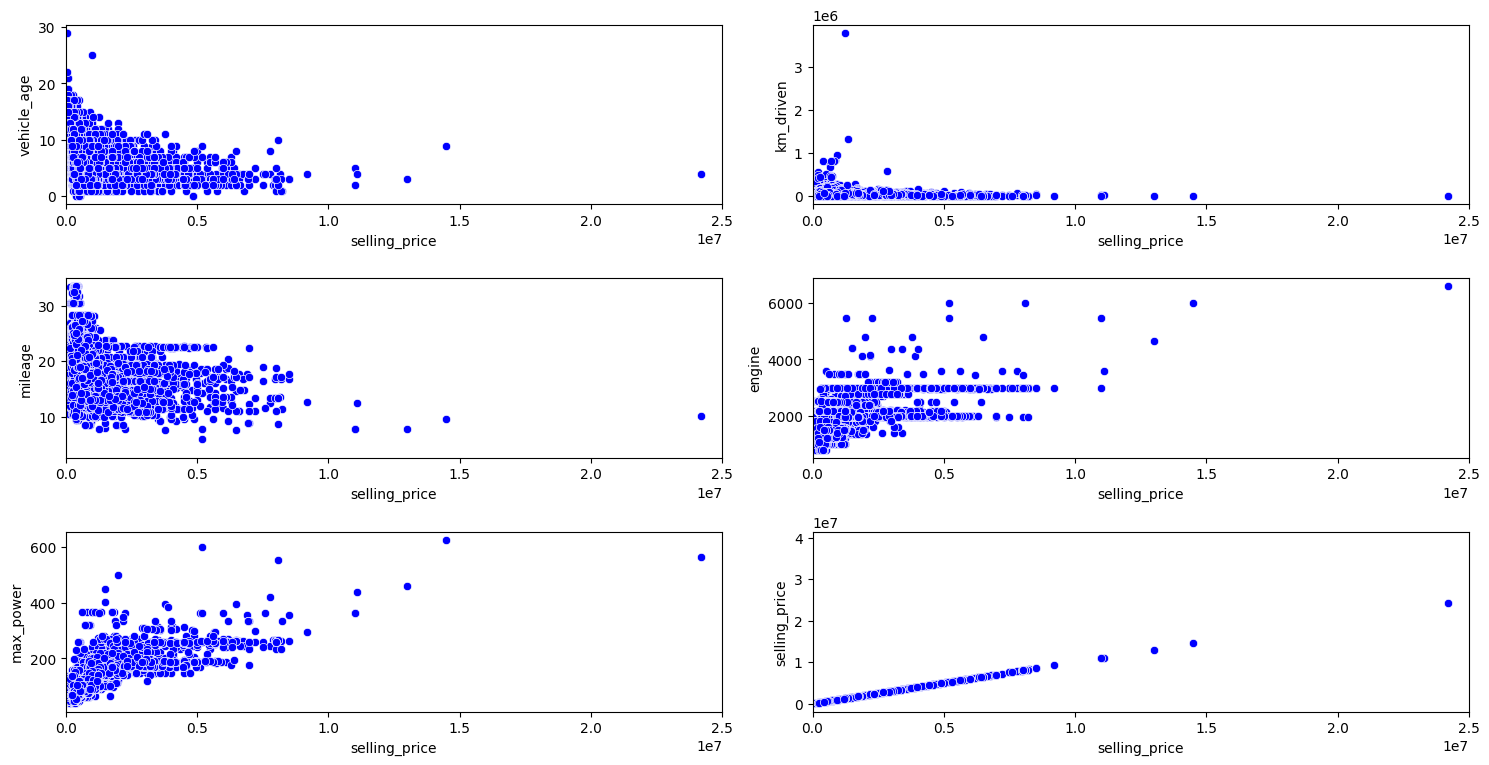

In [ ]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='selling_price', y=continuous_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

#### **Insights**
- Lower Vehicle age has more selling price than Vehicle with more age.
- Engine CC has positive effect on price,Vehicle with 2000 cc and below are mostly priced below 5lakh.
- Kms Driven has negative effect on selling price.

# **5.3 Multivariate Analysis**

## **Check Multicollinearity in Numerical features**

In [ ]:
df[numeric_features].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


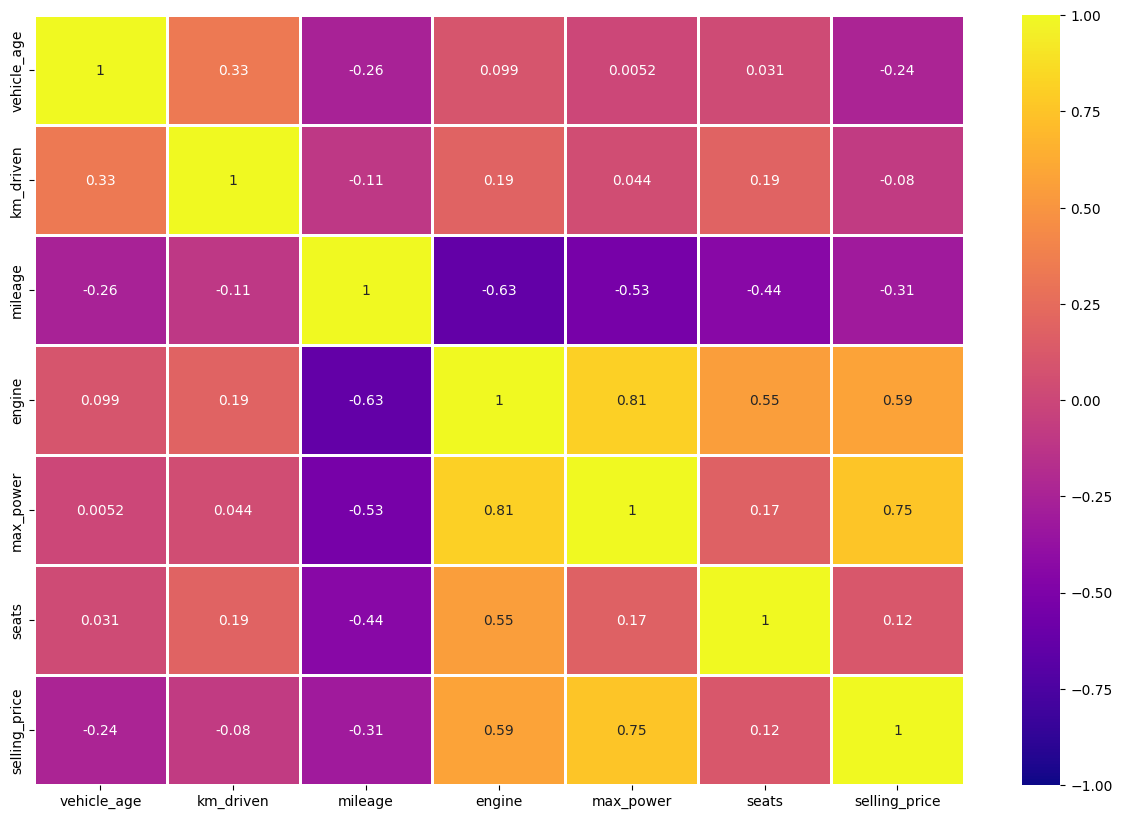

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df[numeric_features].corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)
plt.show()

#### **Insights**
- 1. Max Power and Engine are highly correlated
- 2. Max Power and Selling Price are highly correlated.

# **Check Multicollinearity for Categorical features**

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e Selling Price**

In [ ]:
from scipy.stats import chi2_contingency
chi2_test = []

for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['selling_price'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
test_result = pd.DataFrame(data=[categorical_features, chi2_test]).T
test_result.columns = ['Categorical Features', 'Hypothesis Result']

print('-'*100)
print('Chi-Squarred Test (Checking Multi-collinearity for  Categorical features) results are as follows :')
print('-'*100)

test_result

----------------------------------------------------------------------------------------------------
Chi-Squarred Test (Checking Multi-collinearity for  Categorical features) results are as follows :
----------------------------------------------------------------------------------------------------


,Categorical Features,Hypothesis Result
0,car_name,Reject Null Hypothesis
1,brand,Reject Null Hypothesis
2,model,Reject Null Hypothesis
3,seller_type,Reject Null Hypothesis
4,fuel_type,Reject Null Hypothesis
5,transmission_type,Reject Null Hypothesis


# **7) Data Cleaning & Preprocessing II**

Not required as of now. Preprocessing will be taken care during feature engineering

# **8) Insights from Data Visualization**

## **Selling Price Distribution (Target Feature Distribution)**

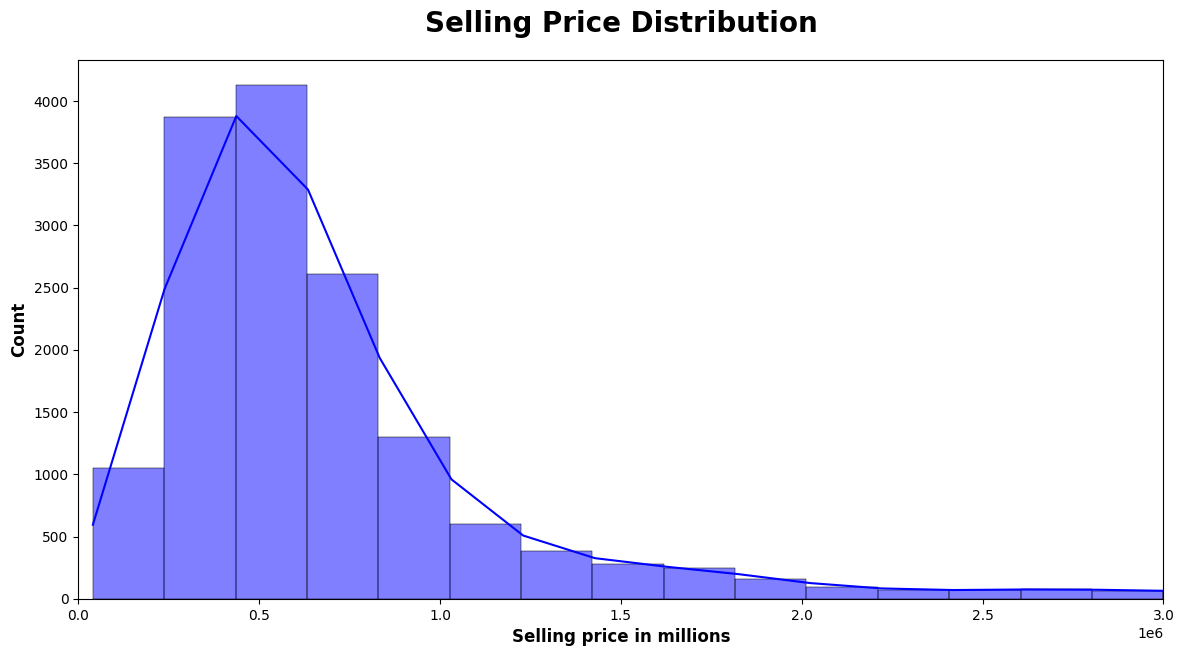

In [ ]:
plt.subplots(figsize=(14,7))
sns.histplot(df.selling_price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

- From the chart it is clear that the Target Variable Skewed

## **Most Sold Cars on CarDekho Website**

In [ ]:
print('-'*50)
print('Top 10 Sold Cars on CarDekho Website')
print('-'*50)

df.car_name.value_counts()[0:10]

--------------------------------------------------
Top 10 Sold Cars on CarDekho Website
--------------------------------------------------


,count
car_name,
Hyundai i20,906
Maruti Swift Dzire,890
Maruti Swift,781
Maruti Alto,778
Honda City,757
Maruti Wagon R,717
Hyundai Grand,580
Toyota Innova,545
Hyundai Verna,492


- Most Selling Used Car is Hyundai i20

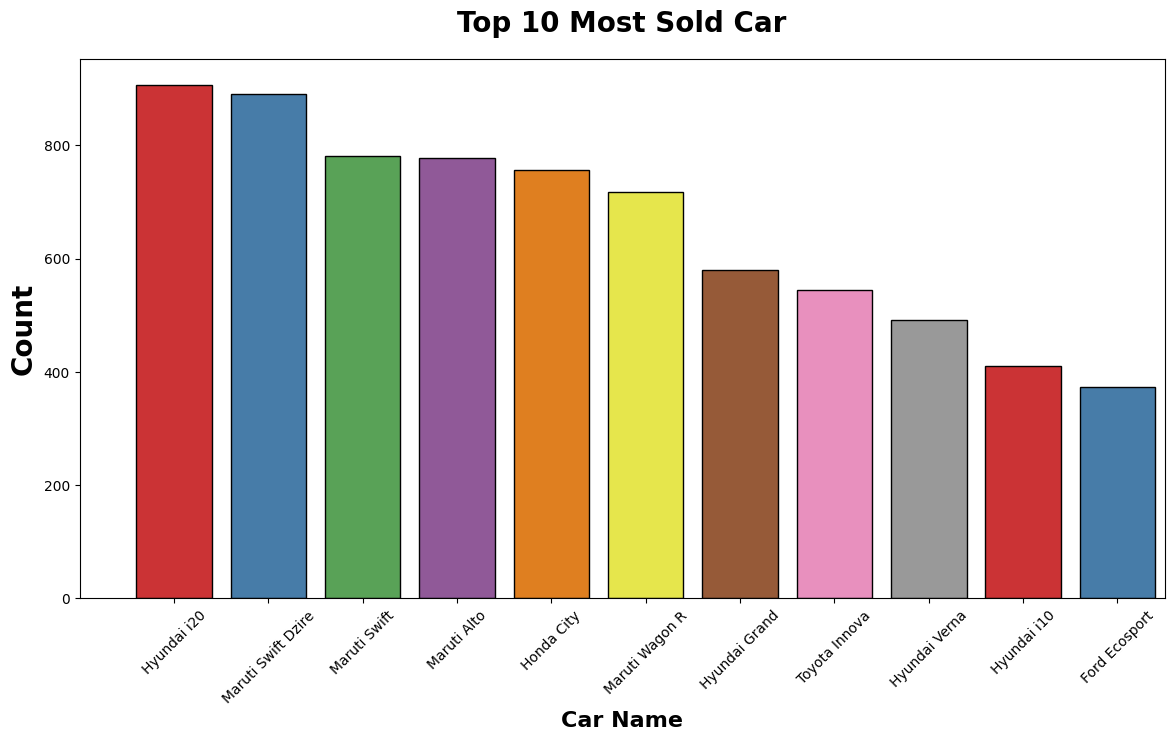

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="car_name", data=df,ec = "black",palette="Set1",order = df['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

- Check mean price of Hyundai i20 which is most sold

In [ ]:
i20 = df[df['car_name'] == 'Hyundai i20']['selling_price'].mean()
print(f'The mean price of Hyundai i20 is {i20:.2f} Rupees')

The mean price of Hyundai i20 is 543603.75 Rupees


#### **Insights**
* As per the Chart these are top 10 most selling cars in used car website.
* Of the total cars sold Hyundai i20 shares 5.8% of total ads posted and followed by Maruti Swift Dzire.
* Mean Price of Most Sold Car is 5.4 lakhs.
* This Feature has impact on the Target Variable.

## **Most Sold Car Brand on CarDekho Website**

In [ ]:
print('-'*50)
print('Top 10 Most Sold Car Brand')
print('-'*50)

df.brand.value_counts()[0:10]

--------------------------------------------------
Top 10 Most Sold Car Brand
--------------------------------------------------


,count
brand,
Maruti,4992
Hyundai,2982
Honda,1485
Mahindra,1011
Toyota,793
Ford,790
Volkswagen,620
Renault,536
BMW,439


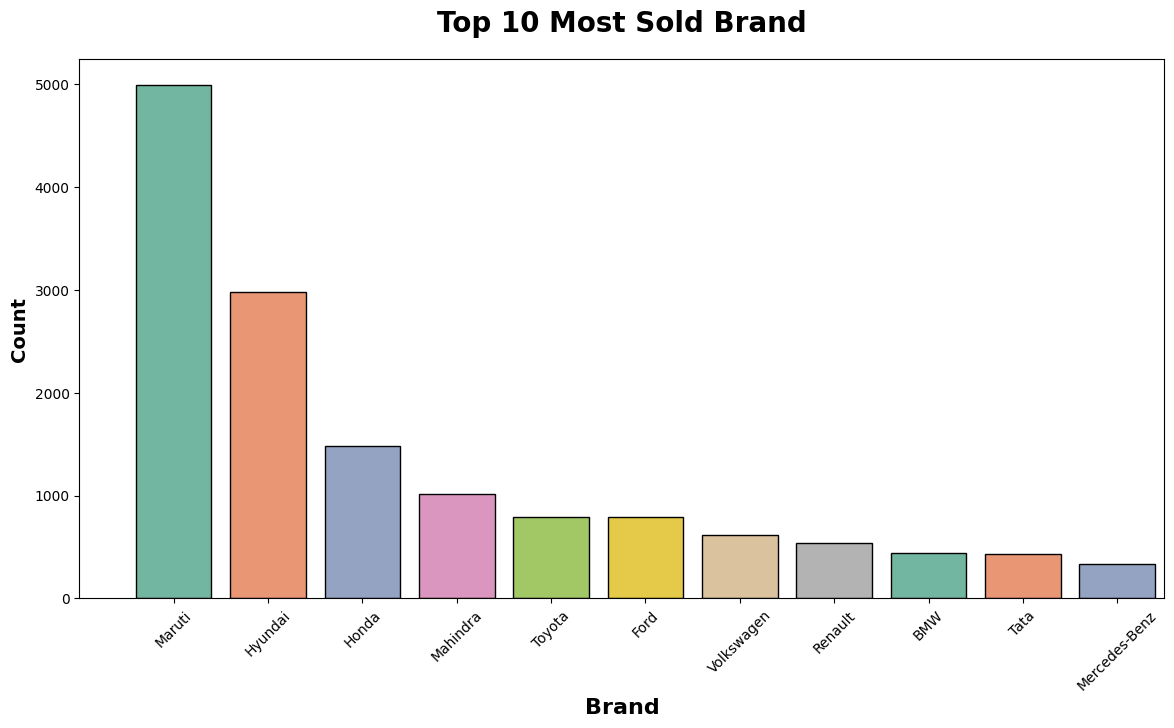

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand", data=df,ec = "black",palette="Set2",order = df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

- Check the Mean price of Maruti brand which is most sold

In [ ]:
maruti = df[df['brand'] == 'Maruti']['selling_price'].mean()
print(f'The mean price of Maruti is {maruti:.2f} Rupees')

The mean price of Maruti is 487089.32 Rupees


#### **Insights**
* As per the Chart Maruti has the most share of Ads in Used car website and Maruti is the most sold brand.
* Following Maruti we have Hyundai and Honda.
* Mean Price of Maruti Brand is 4.8 lakhs.

## **Costlier Brand on CarDekho Website**

In [ ]:
brand = df.groupby('brand').selling_price.max()
brand = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]

print('-'*50)
print('Top 10 Costlier Brands on CarDekho Website')
print('-'*50)

brand

--------------------------------------------------
Top 10 Costlier Brands on CarDekho Website
--------------------------------------------------


,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


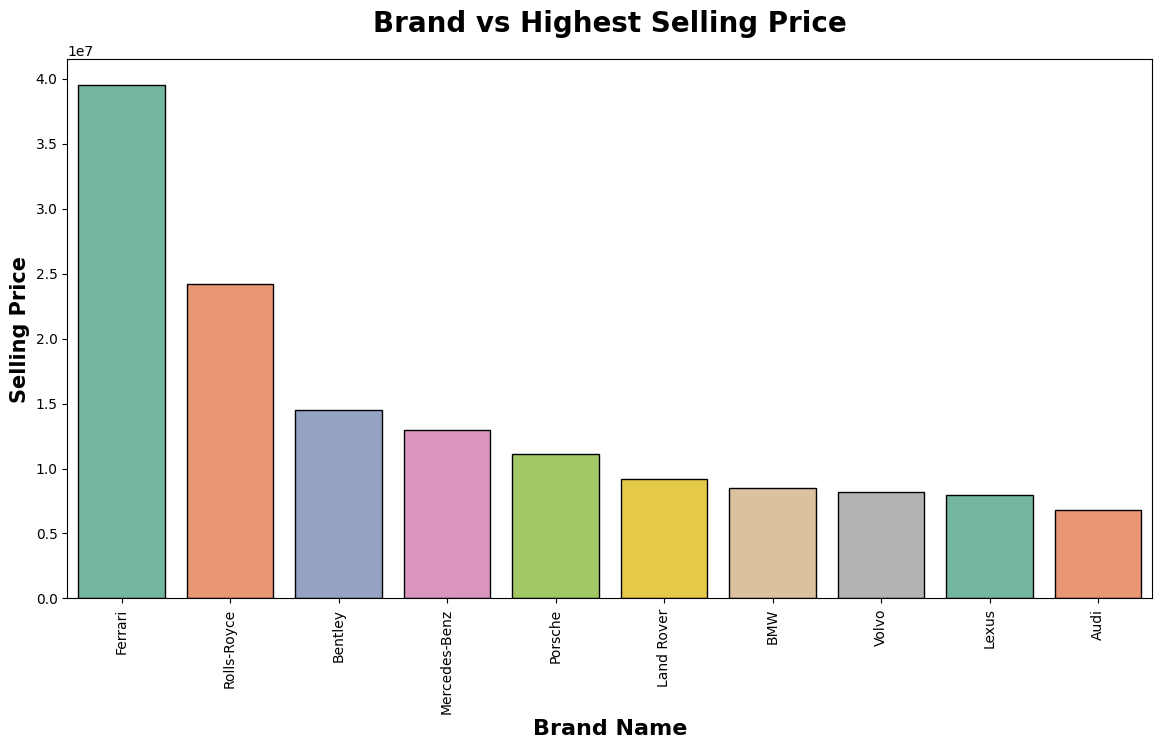

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.selling_price,ec = "black",palette="Set2")
plt.title("Brand vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

#### **Insights**
* Costliest Brand sold is Ferrari at 3.95 Crores.
* Second most costliest car Brand is Rolls-Royce as 2.42 Crores.
* Brand name has very clear impact on selling price.

## **Costlier Car on CarDekho Website**

In [ ]:
car= df.groupby('car_name').selling_price.max()
car =car.to_frame().sort_values('selling_price',ascending=False)[0:10]

print('-'*50)
print('Top 10 Costlier Cars on CarDekho Website')
print('-'*50)

car

--------------------------------------------------
Top 10 Costlier Cars on CarDekho Website
--------------------------------------------------


,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


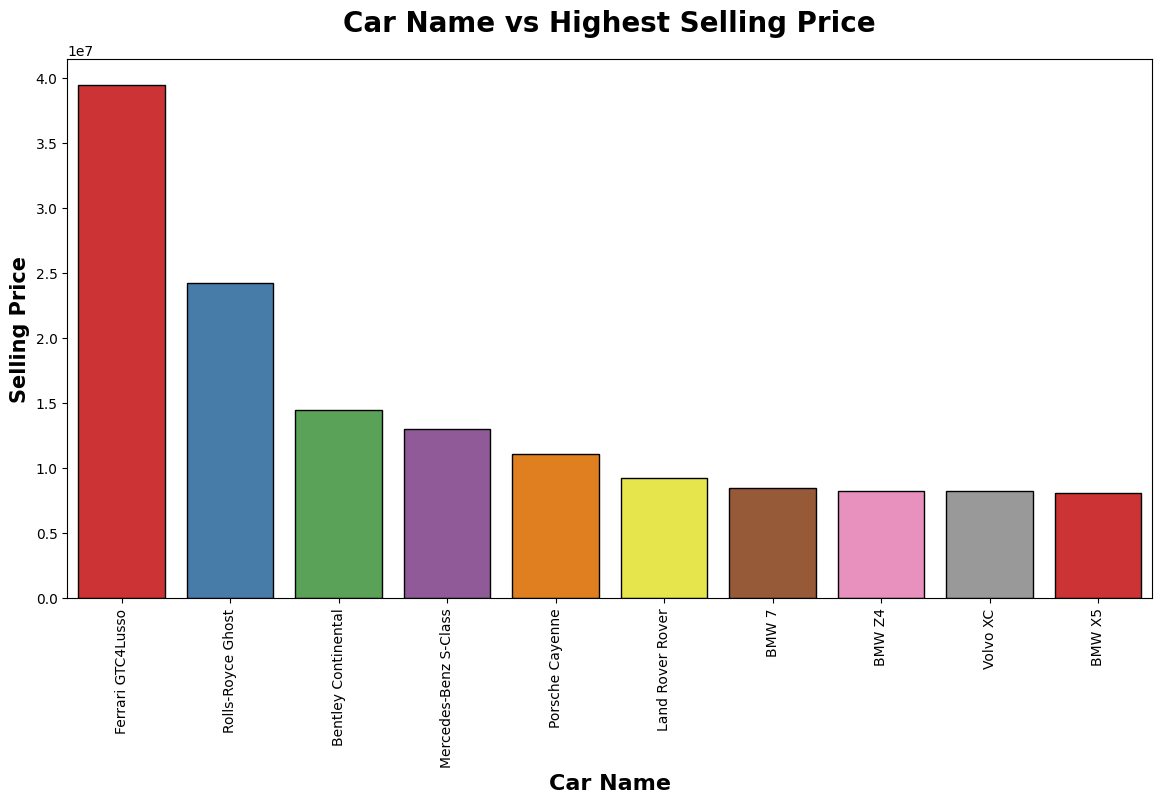

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index, y=car.selling_price,ec = "black",palette="Set1")
plt.title("Car Name vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

#### **Insights**
* Costliest Car sold is Ferrari GTC4 Lusso followed by Rolls Royce Ghost.
* Ferrari selling price is 3.95 Crs.
* Other than Ferrari other car has priced below 1.5cr.

## **Most Mileage Car Brand on CarDekho Website**

In [ ]:
mileage= df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)

print('-'*50)
print('Most Mileage Car Brand on CarDekho Website')
print('-'*50)

mileage.to_frame()

--------------------------------------------------
Most Mileage Car Brand on CarDekho Website
--------------------------------------------------


,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


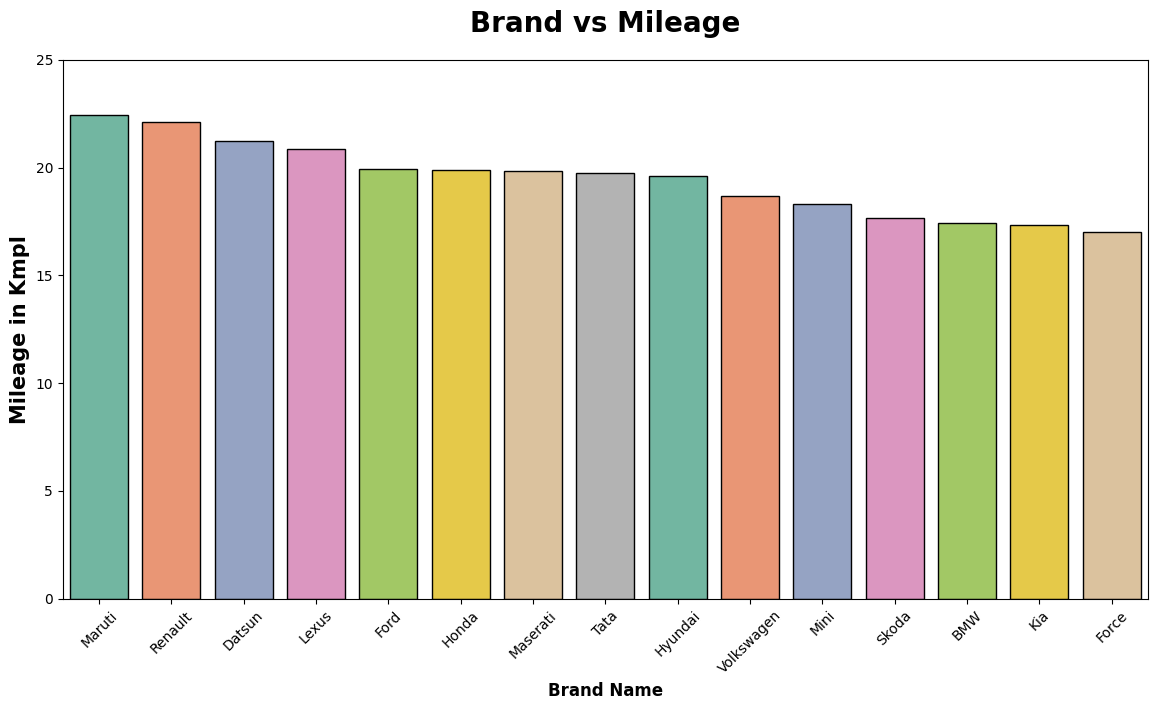

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index, y=mileage.values, ec = "black", palette="Set2")
plt.title("Brand vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=12)
plt.ylim(0,25)
plt.xticks(rotation=45)
plt.show()

## **Most Mileage Car on CarDekho Website**

In [ ]:
mileage_Car= df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)

print('-'*50)
print('Most Mileage Car on CarDekho Website')
print('-'*50)

mileage_Car.to_frame()

--------------------------------------------------
Most Mileage Car on CarDekho Website
--------------------------------------------------


,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


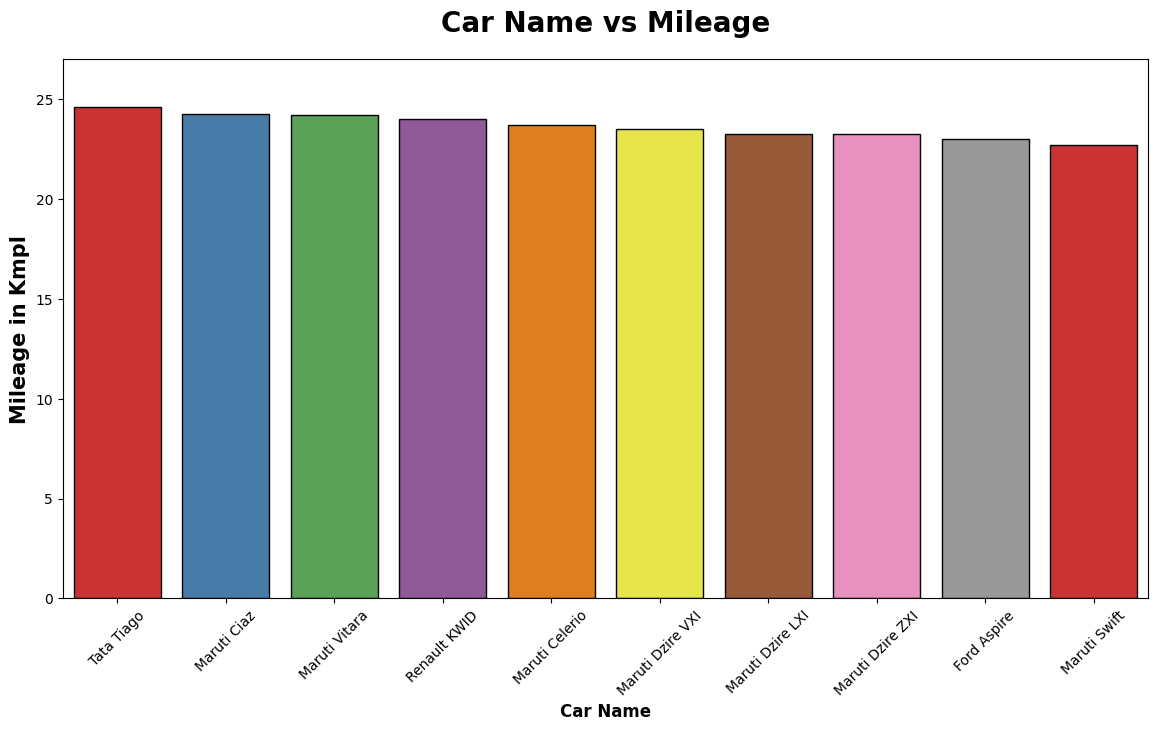

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage_Car.index, y=mileage_Car.values, ec = "black", palette="Set1")
plt.title("Car Name vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=12)
plt.ylim(0,27)
plt.xticks(rotation=45)
plt.show()

## **Kilometers Driven Vs Selling Price**

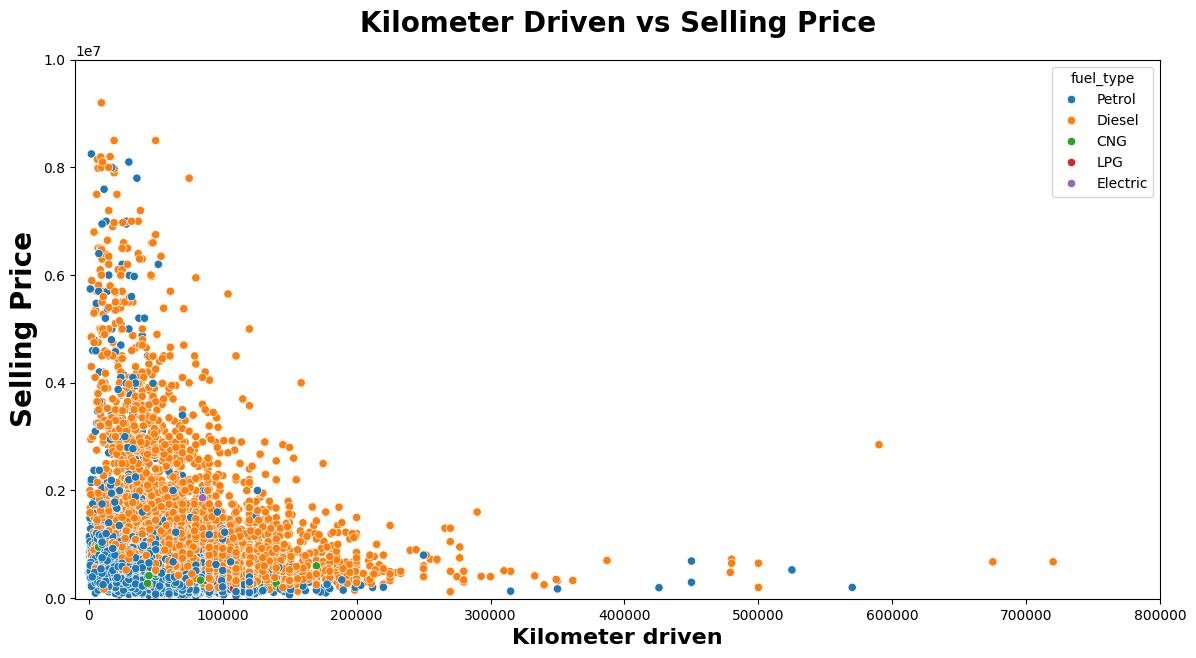

In [ ]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="km_driven", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()



### **Insights**
- Many Cars were sold with kms between 0 to 20k Kilometers
- Low Kms driven cars had more selling price compared to cars which had more kms driven.

## **Fuel Type Vs Selling Price**

In [ ]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


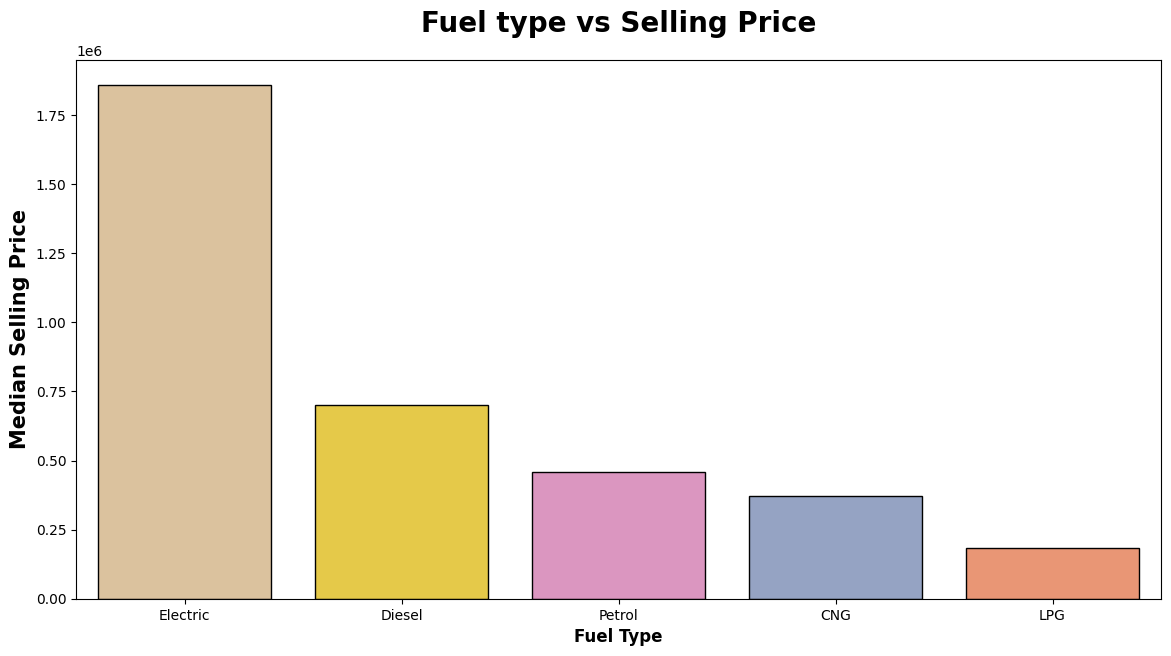

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=fuel.index, y=fuel.values, ec = "black", palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

#### **Insights**
- Electric cars have highers selling average price.
- Followed by Diesel and Petrol.
- Fuel Type is also important feature for the Target variable.

## **Most Sold Fuel type**

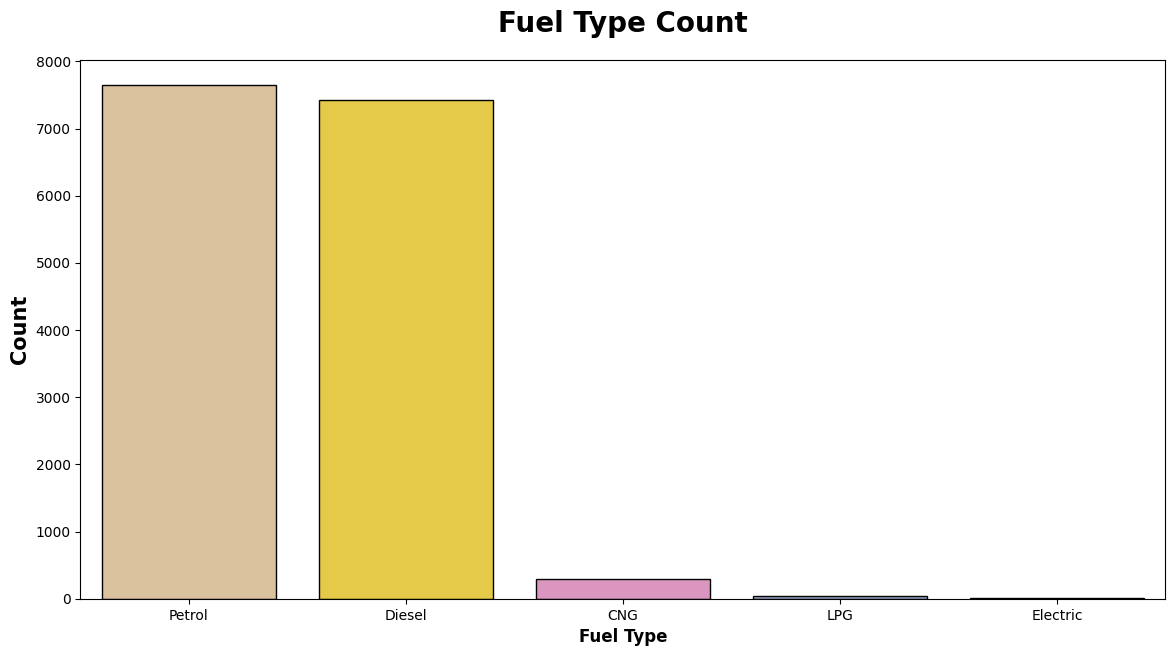

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.fuel_type, ec = "black", palette="Set2_r")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

#### **Insights**
- Petrol and Diesel dominate the used car market in the website.
- The most sold fuel type Vechicle is Petrol.
- Followed by diesel and CNG and least sold is Electric

## **Fuel Type Vs Mileage**

In [ ]:
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


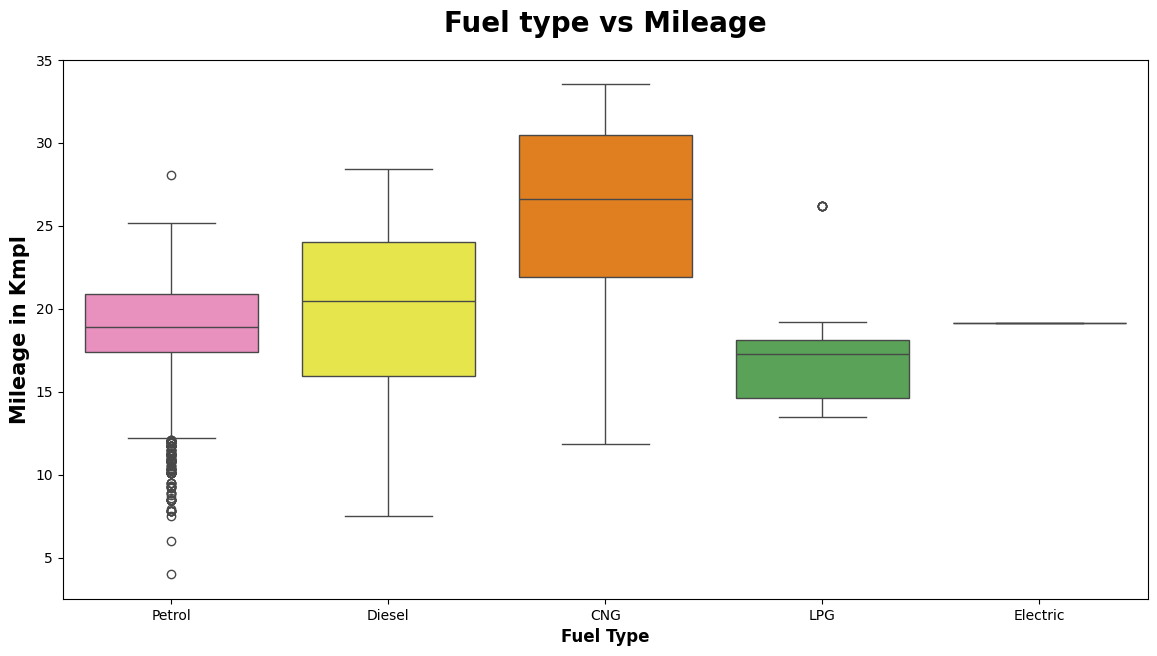

In [ ]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type', y='mileage', data=df,palette="Set1_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

## **Mileage vs Selling Price**

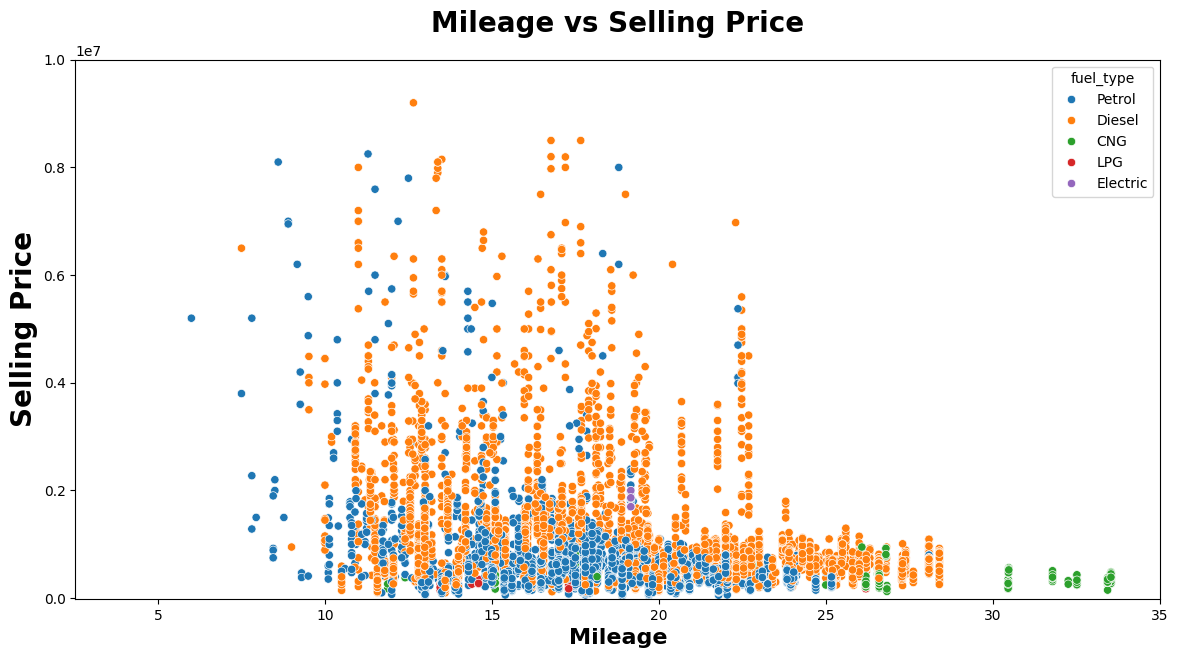

In [ ]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="mileage", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,10000000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

## **Mileage Distribution**

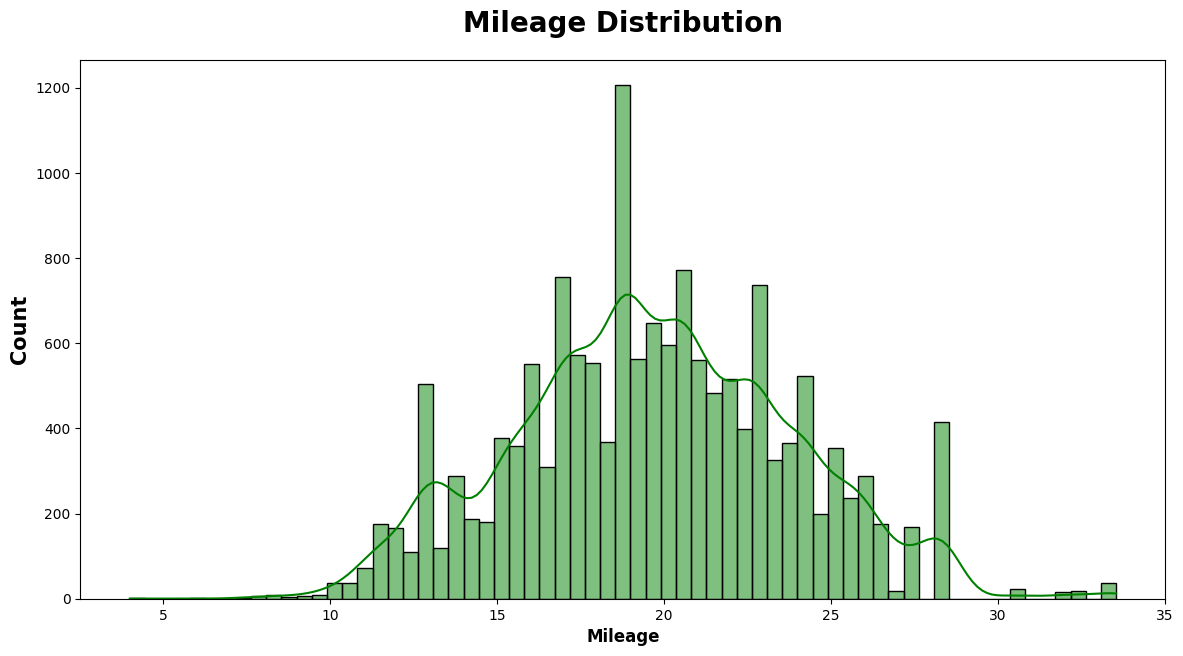

In [ ]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.mileage, ec = "black", color='g', kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.show()

## **Vehicle Age vs Selling Price**

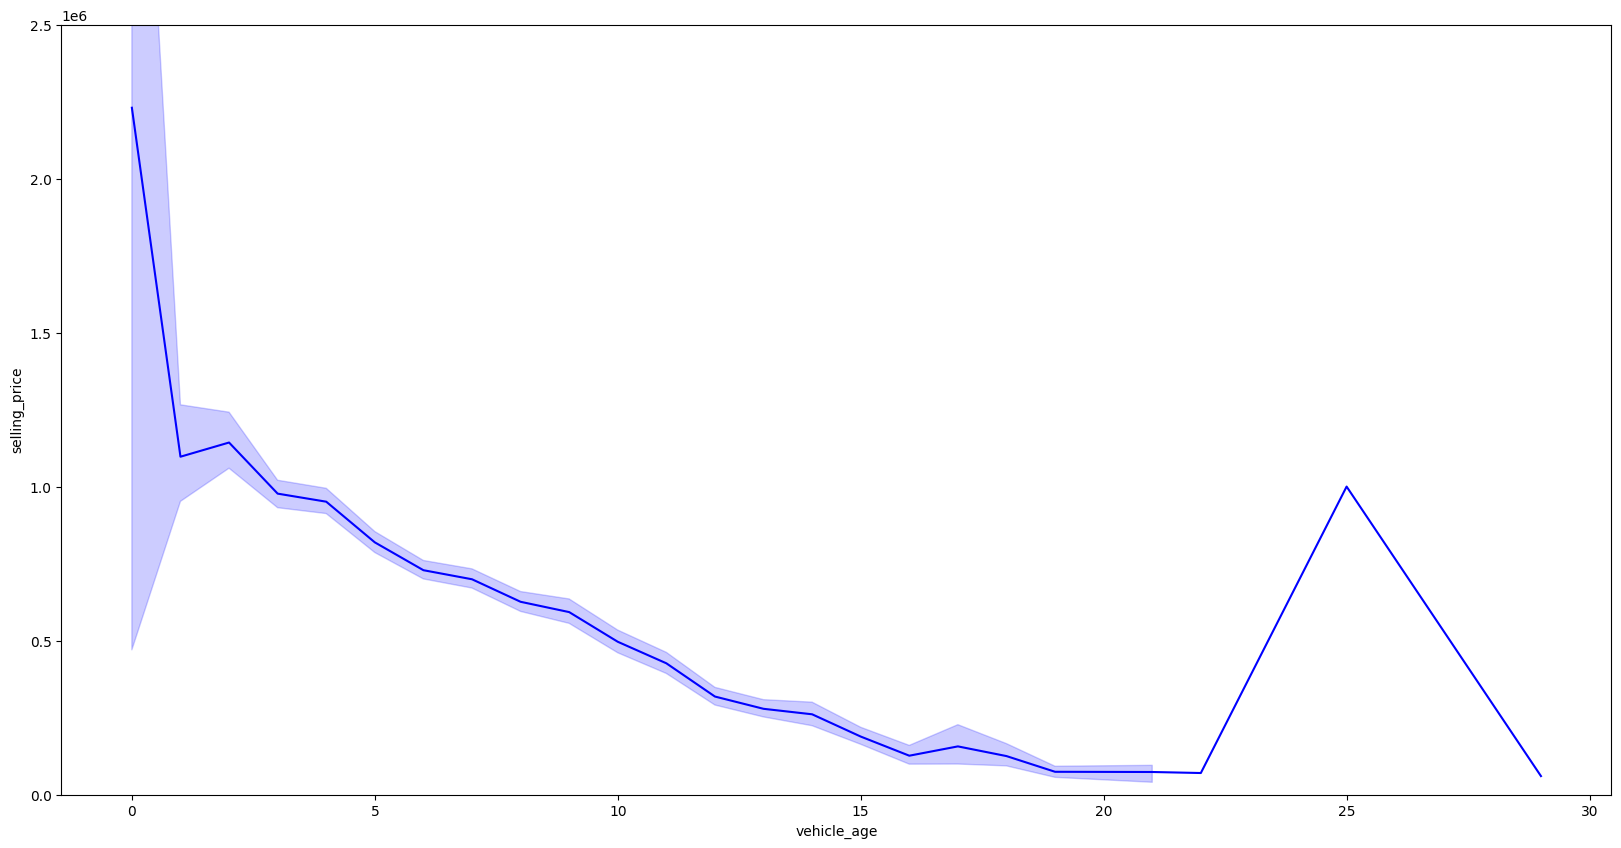

In [ ]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='b')
plt.ylim(0,2500000)
plt.show()

#### **Insight**
- As the Vehicle age increases the price also get reduced.
- Vehicle age has Negative impact on selling price


## **Vehicle Age vs Mileage**

In [ ]:
vehicle_age = df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head(5)

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


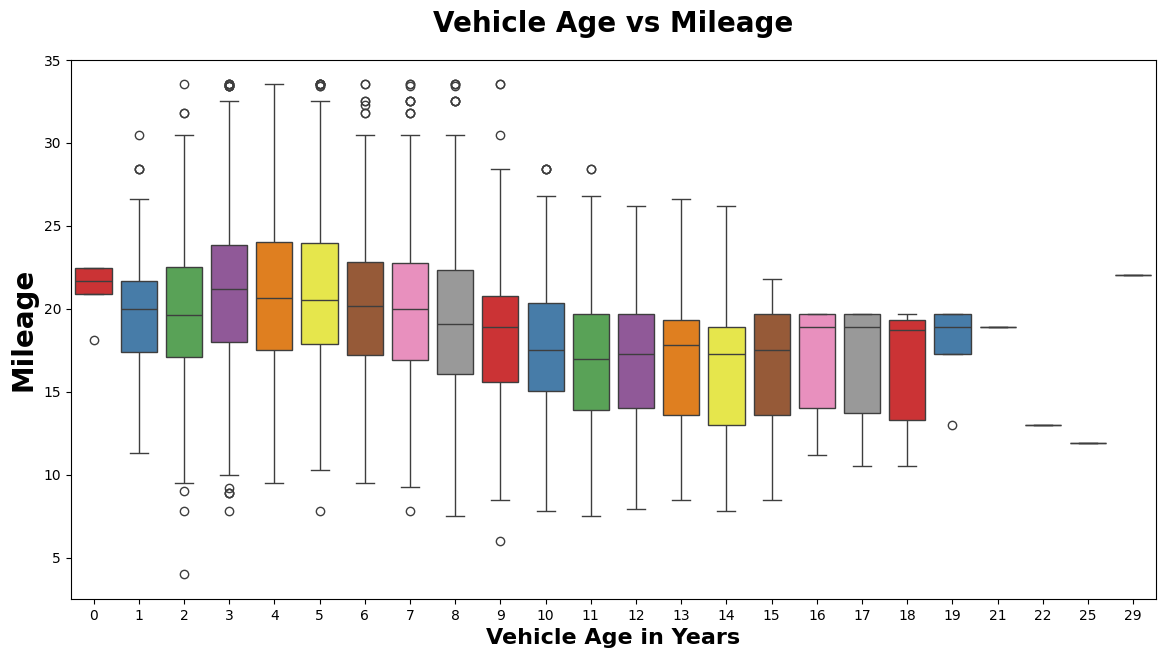

In [ ]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df.vehicle_age, y= df.mileage, palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

#### **Insights**
- As the Age of vehicle increases the median of mileage drops.
- Newer Vehicles have more mileage median older vehicle.

In [ ]:
oldest = df.groupby('car_name')['vehicle_age'].max().sort_values(ascending=False).head(10)
oldest.to_frame()

,vehicle_age
car_name,
Maruti Alto,29
BMW 3,25
Honda City,22
Maruti Wagon R,21
Mahindra Bolero,18
Mahindra Scorpio,18
Skoda Octavia,18
Honda CR-V,17
Mercedes-Benz E-Class,17


#### **Insight**
- Maruti Alto is the Oldest car available 29 years old in the used car website followed by BMW 3 for 25 years old.

## **Transmission Type Vs Count**

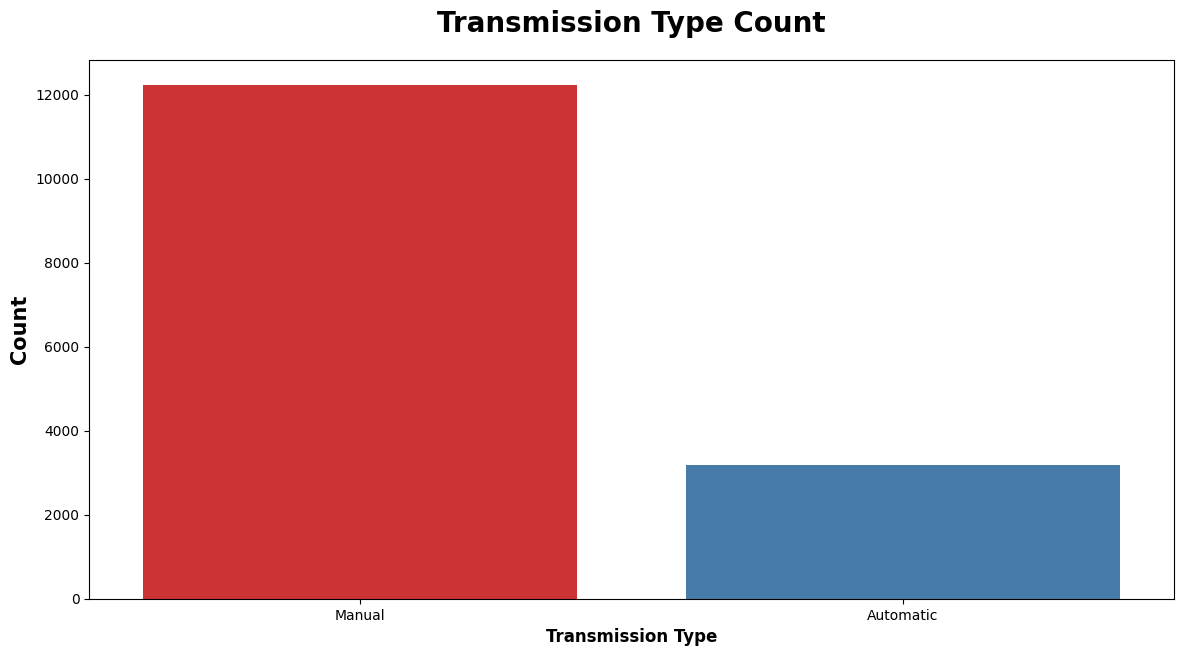

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission_type', data=df,palette="Set1")
plt.title("Transmission Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

## **Transmission Type Vs Selling Price**

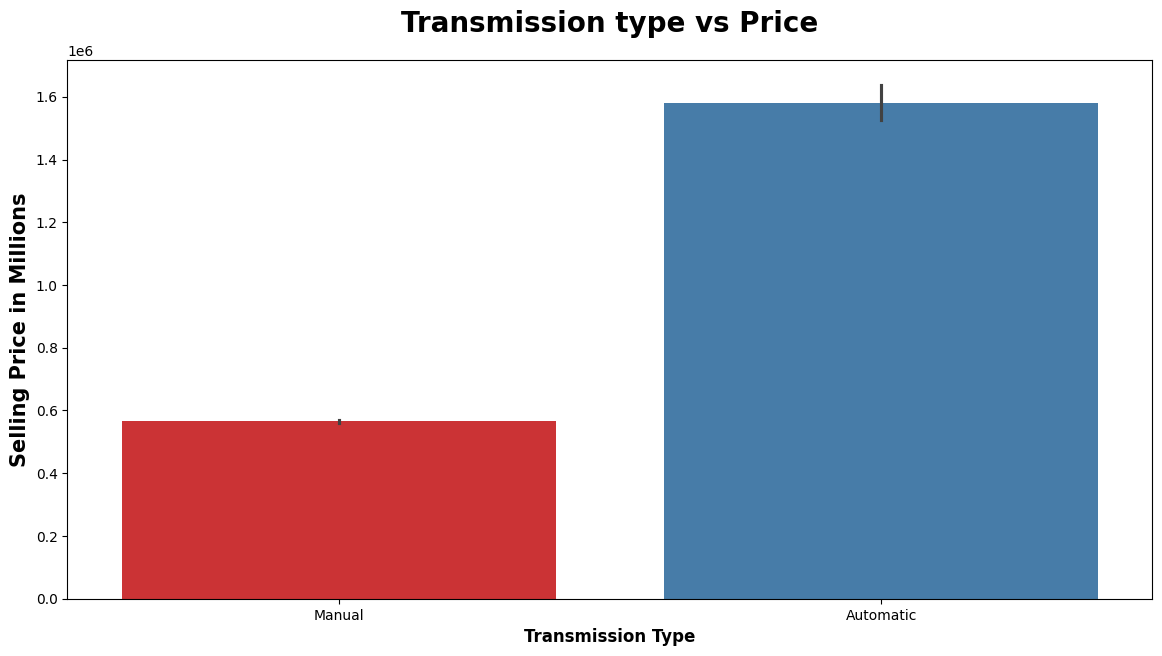

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission_type', y='selling_price', data=df,palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

#### **Insight**
- Manual Transmission was found in most of the cars which was sold.
- Automatic cars have more selling price than manual cars.

## **Seller Type  Vs Count**

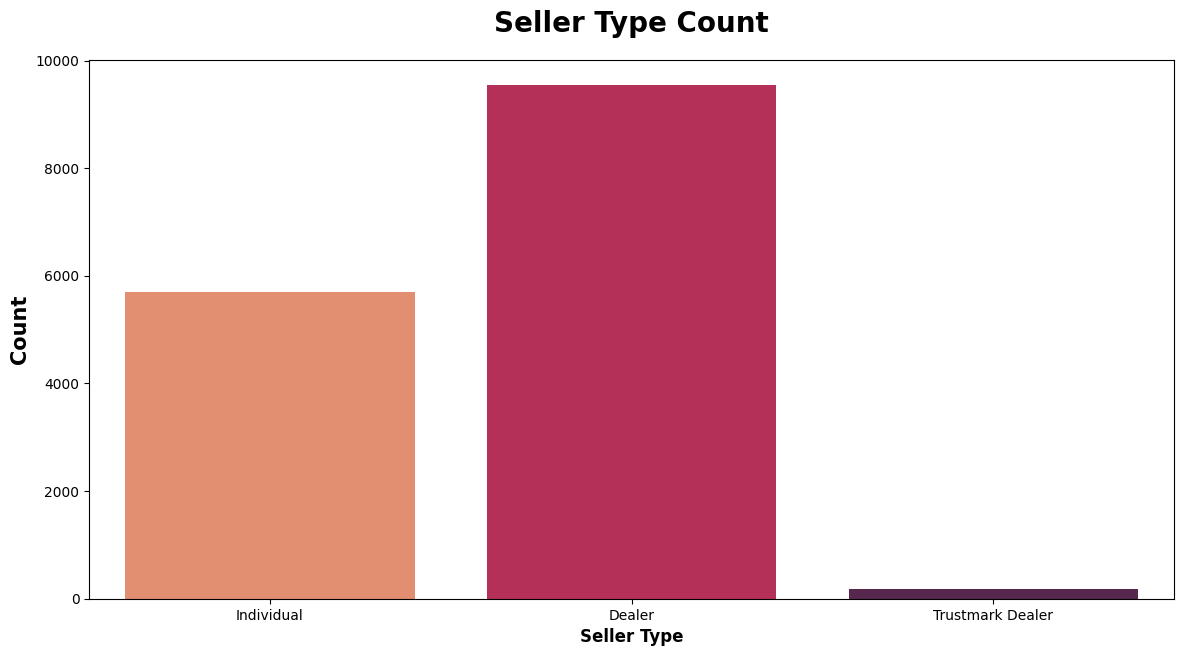

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x='seller_type', data=df,palette="rocket_r")
plt.title("Seller Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Seller Type", weight="bold", fontsize=12)
plt.show()

## **Seller Type vs Selling Price**

In [ ]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


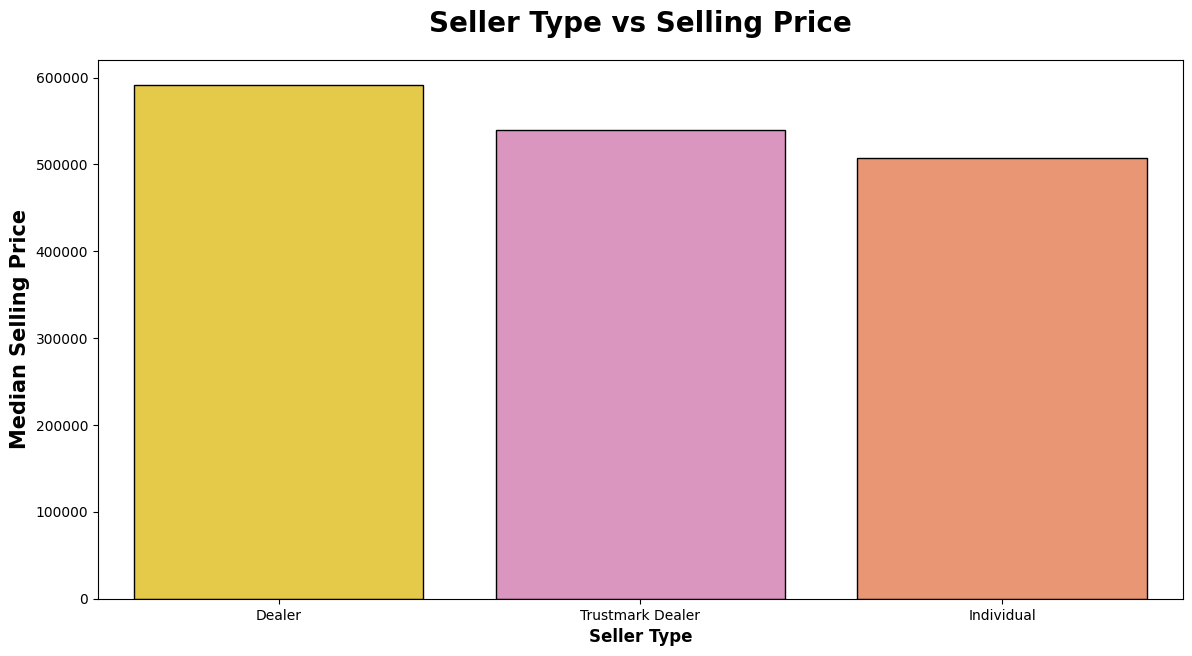

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=dealer.index, y=dealer.values, ec = "black", palette="Set2_r")
plt.title("Seller Type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Seller Type", weight="bold", fontsize=12)
plt.show()

#### **Insights**
- Dealers have put more ads on used car website.
- Dealers have put 9539 ads with median selling price of 5.91 Lakhs.
- Followed by Individual with 5699 ads with median selling price of 5.4 Lakhs.
- Dealers have more median selling price than Individual.

## **Final Report**

- The datatypes and Column names were right and there was 15411 rows and 13 columns
- The `selling_price` column is the target to predict. i.e Regression Problem.
- There are outliers in the `km_driven`, `enginer`, `selling_price`, and `max power`.
- Dealers are the highest sellers of the used cars.
- Skewness is found in few of the columns will check it after handling outliers.
- Vehicle age has negative impact on the price.
- Manual cars are mostly sold and automatic has higher selling average than manual cars.
- Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.
- We just need less data cleaning for this dataset.

# **9) Feature Engineering**

In [ ]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


## **Removing unnecessary features**

**Dropping `car_name` ,`brand` and `model`**

These features  are not directly correlated with the price of car and they can actually introduce noise into the model. For example, two cars with the same features but different brands may have different prices. This is because brand reputation and perceived quality can play a role in determining the price of a car. By dropping the `car_name` ,`brand` and `model`, we can create a model that is more accurate and reliable.

In [ ]:
# Creating copy of  original dataframe

df_model=df.copy()

df_model

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [ ]:
df_model.drop(labels=['car_name','brand','model'],axis=1,inplace=True)

df_model

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...
19537,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


## **Converting Categorical Columns into numerical**

Using **`One Hot Encoding (get_dummies)`** to convert categorical variables to numerical

In [ ]:
df_model=pd.get_dummies(df_model,dtype=float)
df_model

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,550000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,215000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,226000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,570000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,9,10723,19.81,1086,68.05,5,250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19540,2,18000,17.50,1373,91.10,7,925000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19541,6,67000,21.14,1498,103.52,5,425000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
19542,5,3800000,16.00,2179,140.00,7,1225000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_model.dtypes

,0
vehicle_age,int64
km_driven,int64
mileage,float64
engine,int64
max_power,float64
seats,int64
selling_price,int64
seller_type_Dealer,float64
seller_type_Individual,float64
seller_type_Trustmark Dealer,float64


## **Creating Feature Matrix (Independent Variables) & Target Variable (Dependent Variable)**

In [ ]:
X=df_model.drop('selling_price',axis=1)      # Feature Matrix
X

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,9,10723,19.81,1086,68.05,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19540,2,18000,17.50,1373,91.10,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19541,6,67000,21.14,1498,103.52,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
19542,5,3800000,16.00,2179,140.00,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y=df_model['selling_price']    # Target Variable
y

,selling_price
0,120000
1,550000
2,215000
3,226000
4,570000
...,...
19537,250000
19540,925000
19541,425000
19542,1225000


## **Checking for important features**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()

print(model.fit(X,y))

ExtraTreesRegressor()


In [ ]:
print('-'*50)
print('Checking for feature importance')
print('-'*50)

print(model.feature_importances_)

--------------------------------------------------
Checking for feature importance
--------------------------------------------------
[1.69820426e-01 4.80899270e-02 5.74268483e-02 1.53124170e-01
 3.70863973e-01 1.62832225e-02 4.48058961e-03 4.10697168e-03
 2.25694574e-05 4.22050209e-05 8.87861930e-03 1.65302626e-05
 1.79331348e-06 1.54453408e-02 6.56178501e-02 8.57789638e-02]


### **Visulization for feature importance**

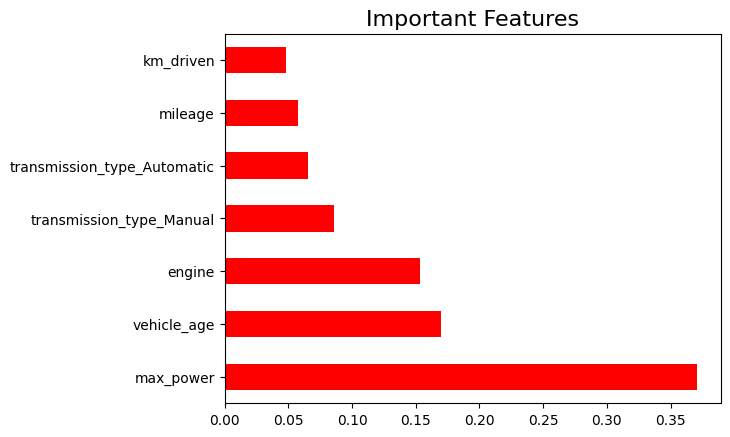

In [ ]:
imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

However, we will use all features for prediction

# **Save PreProcess Data File**

In [ ]:
df.to_csv('preprocessed_data.csv', index=False)

# **Model Building & Evaluation**


## **Objective:**

The goal of car price prediction is to develop a machine learning model that accurately forecasts the resale value of vehicles based on key attributes like make, model, mileage, and age. This helps ensure transparent and fair pricing, assists buyers and sellers in making informed decisions, and enhances market efficiency.

## **Importing important libraries for Model Building**

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from xgboost import XGBRegressor

## **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## **Initialize and fit the Model**

# **Random Forest**

The RandomForestRegressor is a versatile machine learning model that uses multiple decision trees to predict outcomes more accurately than a single tree could. In the context of car price prediction, it helps in understanding complex relationships between various features like make, model, age, mileage, and condition, providing robust and reliable pricing estimations based on historical data.

In [ ]:
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
score = random_forest_model.score(X_test, y_test)
score

0.9380424329347739

# **SVR**

The Support Vector Regressor (SVR) applies the principles of Support Vector Machines to regression problems, creating a model that aims to fit the error within a certain threshold. For car price prediction, SVR is particularly effective when dealing with non-linear relationships and high-dimensional spaces, ensuring that the model can generalize well from the training data to unseen data.

In [ ]:
SVR = SVR()
SVR.fit(X_train, y_train)

SVR()

In [ ]:
SVR.score(X_test, y_test)

-0.06355946408577262

# **Decesion Tree**

The Decision Tree Regressor constructs a model in the form of a tree structure, dividing the dataset into smaller subsets based on descriptive features, which can include aspects like car make, year, and mileage. This approach is intuitive and easy to visualize, making it useful for car price prediction as it clearly shows the decision paths and how different features directly affect the vehicle's estimated value.

In [ ]:
DecisionTreeRegressor = DecisionTreeRegressor(random_state=1)
DecisionTreeRegressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
DecisionTreeRegressor.score(X_test, y_test)

0.8945359167520699

# **XGBOST**

XGBoost (eXtreme Gradient Boosting) is an advanced implementation of gradient boosting that is designed to be highly efficient, flexible, and portable. It uses decision trees as base learners and is highly favored for its performance in regression tasks, including car price prediction. XGBoost is particularly valued for its ability to handle large datasets efficiently, manage missing data, and improve prediction accuracy through its robust handling of a variety of data types and relationships.

In [ ]:
XGBRegressor = XGBRegressor()
XGBRegressor.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
XGBRegressor.score(X_test, y_test)

0.9277094602584839

# **Models Evaluation**

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

Here's a brief explanation of each of the metrics you've mentioned, commonly used to evaluate regression models such as those for car price prediction:

**Mean Squared Error (MSE):**

MSE is the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. It gives an idea of the magnitude of error made by the model. Lower values of MSE indicate better fit.

**Root Mean Squared Error (RMSE):**

RMSE is the square root of the mean of the squared errors. It is a more interpretable version of MSE as it is in the same units as the response variable. Like MSE, a lower RMSE is better as it indicates that the errors between predicted values and observed values are smaller.

**Explained Variance Score:**

This score measures the proportion of the total variance in the dependent variable that is predicted from the independent variable(s). An explained variance score of 1 indicates perfect prediction with no error, while a score closer to 0 indicates that the model fails to accurately capture the data’s variance.

**R-Square Score (R²):**

R² is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, with 1 being a perfect fit and values closer to 0 indicating poorer fits.


These metrics are crucial for assessing the performance of your model and determining how well it might perform in practical scenarios, such as predicting car prices.

# **Training Data Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# Define your training data (X_train, y_train)
# X_train, y_train = ...

# Initialize models
models = [
    SVR(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()
]
model_names = [
    'Support Vector Regression', 'Decision Tree Regressor',
    'Random Forest Regressor', 'XGBoost'
]

# Initialize lists to store metrics
mse_train = []
rmse_train = []
evs_train = []
r_square_train = []

# Evaluate each model on the training data
for model in models:
    try:
        model.fit(X_train, y_train)
        pred_train = model.predict(X_train)
        mse_train.append(mean_squared_error(y_train, pred_train))
        rmse_train.append(np.sqrt(mse_train[-1]))
        evs_train.append(explained_variance_score(y_train, pred_train))
        r_square_train.append(r2_score(y_train, pred_train))
    except Exception as e:
        print(f"Error with model {model.__class__.__name__}: {e}")
        mse_train.append(None)
        rmse_train.append(None)
        evs_train.append(None)
        r_square_train.append(None)

# Create DataFrame with training metrics
training_results_df = pd.DataFrame({
    "Model": model_names,
    "Mean Squared Error (Train)": mse_train,
    "Root Mean Squared Error (Train)": rmse_train,
    "Explained Variance Score (Train)": evs_train,
    "R-Square Score (Train)": r_square_train
}).set_index('Model')

# Apply formatting for better readability
formatted_training_df = training_results_df.style.format({
    "Mean Squared Error (Train)": "{:,.2f}",
    "Root Mean Squared Error (Train)": "{:,.2f}",
    "Explained Variance Score (Train)": "{:.4f}",
    "R-Square Score (Train)": "{:.4f}"
})

# Display the formatted DataFrame
formatted_training_df

,Mean Squared Error (Train),Root Mean Squared Error (Train),Explained Variance Score (Train),R-Square Score (Train)
Model,,,,
Support Vector Regression,"885,763,246,973.79","941,149.96",0.0001,-0.0568
Decision Tree Regressor,"363,429,638.49","19,063.83",0.9996,0.9996
Random Forest Regressor,"18,289,643,002.53","135,239.21",0.9782,0.9782
XGBoost,"8,263,485,440.00","90,903.72",0.9901,0.9901


# **Test Data Evaluation**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Define your training and testing data
# X_train, X_test, y_train, y_test = train_test_split(...)

# Initialize models and names
models = [
    SVR(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()
]
model_names = [
    'Support Vector Regression', 'Decision Tree Regressor',
    'Random Forest Regressor', 'XGBoost'
]

# Initialize lists to store metrics
mse = []
rmse = []
evs = []
r_square_score = []

# Evaluate each model
for model in models:
    try:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        mse.append(mean_squared_error(y_test, pred))
        rmse.append(np.sqrt(mse[-1]))
        evs.append(explained_variance_score(y_test, pred))
        r_square_score.append(r2_score(y_test, pred))
    except Exception as e:
        print(f"Error with model {model.__class__.__name__}: {e}")
        mse.append(None)
        rmse.append(None)
        evs.append(None)
        r_square_score.append(None)

# Create DataFrame with formatted numbers
ML_model_df = pd.DataFrame({
    "Model": model_names,
    "Mean Squared Error": mse,
    "Root Mean Squared Error": rmse,
    "Explained Variance Score": evs,
    "R-Square Score": r_square_score
}).set_index('Model')

# Applying a local format to the DataFrame for display purposes
formatted_df = ML_model_df.style.format({
    "Mean Squared Error": "{:,.2f}",
    "Root Mean Squared Error": "{:,.2f}",
    "Explained Variance Score": "{:.4f}",
    "R-Square Score": "{:.4f}"
})

# Display the formatted DataFrame
formatted_df

,Mean Squared Error,Root Mean Squared Error,Explained Variance Score,R-Square Score
Model,,,,
Support Vector Regression,"685,334,492,915.19","827,849.32",0.0001,-0.0636
Decision Tree Regressor,"66,178,973,369.19","257,252.74",0.8973,0.8973
Random Forest Regressor,"39,914,818,267.18","199,786.93",0.9381,0.9381
XGBoost,"46,582,431,744.00","215,829.64",0.9277,0.9277


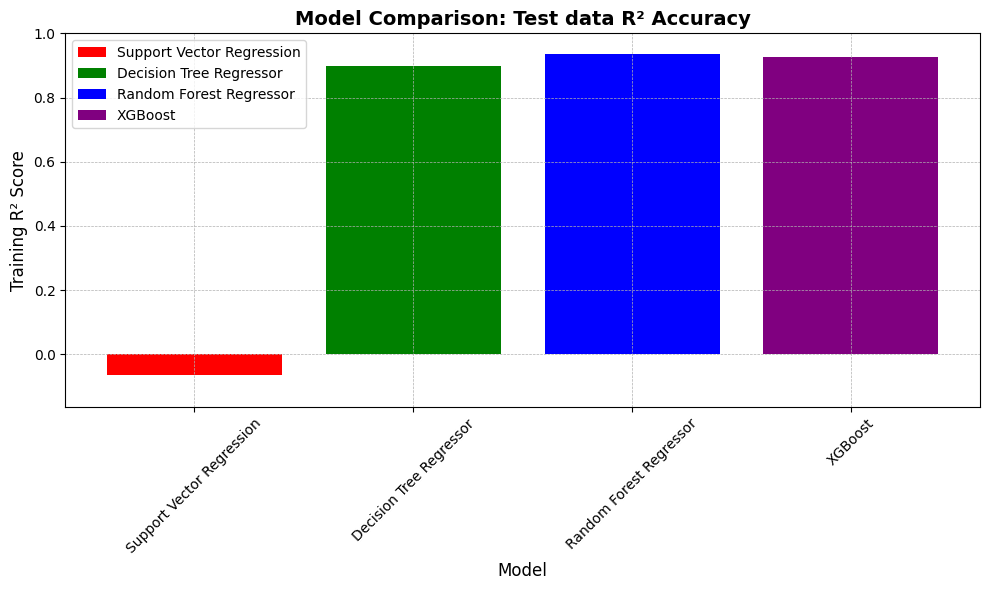

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame using the R-Square scores from your table
results_df = pd.DataFrame({
    "Model": ["Support Vector Regression", "Decision Tree Regressor", "Random Forest Regressor", "XGBoost"],
    "R-Square Score": [-0.0636, 0.8971, 0.9360, 0.9277]
})

# Define a list of unique colors for the bars
colors = ['red', 'green', 'blue', 'purple']

# Plot the R-Square scores for all models
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Model'], results_df['R-Square Score'], color=colors)

# Add a legend
plt.legend(bars, results_df['Model'])

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust the y-axis to not start at 0 for better visibility of differences
plt.ylim(min(results_df['R-Square Score']) - 0.1, 1.0)  # Extend the lower limit for better display of negative scores

# Set titles and labels with enhancements
plt.title("Model Comparison: Test data R² Accuracy", fontsize=14, fontweight='bold')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Training R² Score", fontsize=12)

# Rotate model names for better visibility
plt.xticks(rotation=45)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


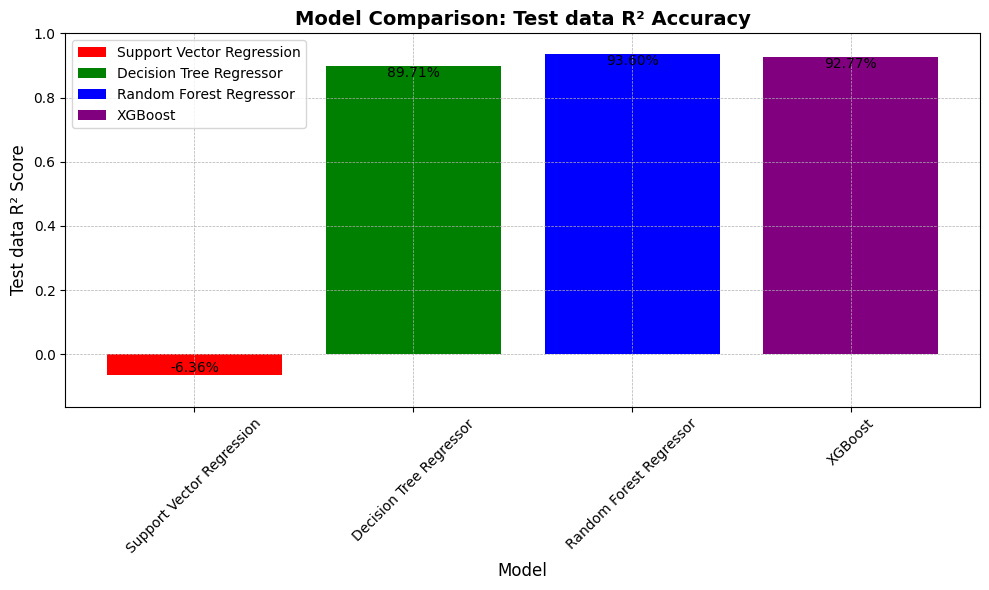

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame using the R-Square scores from your table
results_df = pd.DataFrame({
    "Model": ["Support Vector Regression", "Decision Tree Regressor", "Random Forest Regressor", "XGBoost"],
    "R-Square Score": [-0.0636, 0.8971, 0.9360, 0.9277]
})

# Define a list of unique colors for the bars
colors = ['red', 'green', 'blue', 'purple']

# Plot the R-Square scores for all models
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Model'], results_df['R-Square Score'], color=colors)

# Add percentages above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', va='bottom' if yval < 0 else 'top', ha='center', fontsize=10)

# Add a legend
plt.legend(bars, results_df['Model'])

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust the y-axis to not start at 0 for better visibility of differences
plt.ylim(min(results_df['R-Square Score']) - 0.1, 1.0)  # Extend the lower limit for better display of negative scores

# Set titles and labels with enhancements
plt.title("Model Comparison: Test data R² Accuracy", fontsize=14, fontweight='bold')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Test data R² Score", fontsize=12)

# Rotate model names for better visibility
plt.xticks(rotation=45)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


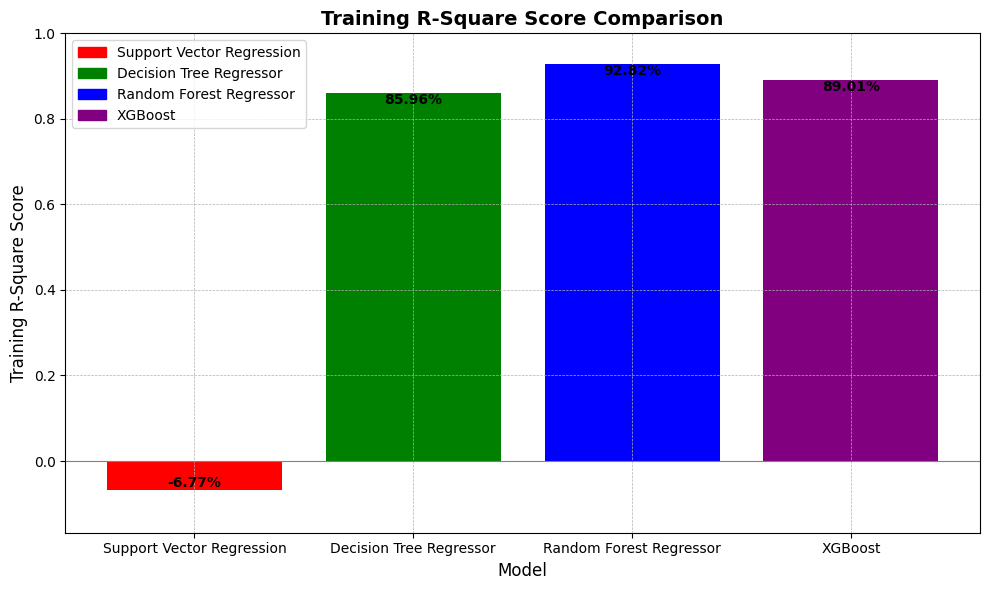

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame using the R-Square scores from your table
data = {
    "Model": ["Support Vector Regression", "Decision Tree Regressor", "Random Forest Regressor", "XGBoost"],
    "R-Square Score": [-0.06768, 0.8596, 0.9282, 0.8901]  # Data extracted from your image
}

results_df = pd.DataFrame(data)

# Define colors for the bars to visually distinguish them
colors = ['red', 'green', 'blue', 'purple']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Model'], results_df['R-Square Score'], color=colors)

# Adding a horizontal line at y=0 to highlight the baseline
plt.axhline(0, color='gray', linewidth=0.8)

# Adding a legend with custom color descriptions
color_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(color_patches, results_df['Model'])

# Add grid, title, and labels
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title("Training R-Square Score Comparison", fontsize=14, fontweight='bold')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Training R-Square Score", fontsize=12)

# Adding percentage labels above the bars
for bar, color in zip(bars, colors):
    y_value = bar.get_height()
    # Convert decimal R-Square Score to percentage format and display it above each bar
    plt.text(bar.get_x() + bar.get_width() / 2, y_value, f'{y_value:.2%}', ha='center',
             va='bottom' if y_value < 0 else 'top', color='black', fontsize=10, fontweight='bold')

# Set y-axis limit dynamically based on the scores to better utilize the chart space
plt.ylim(min(results_df['R-Square Score']) - 0.1, 1.0)

# Improve layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, r2_score

# **Fine tunning on train data**

**Define the Models and Parameter Grid**

In [ ]:
# Assume X_train, y_train have been defined and are ready to use

# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],  # None means unlimited
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Random Forest Regressor
rf = RandomForestRegressor()
rf_param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Scoring function
scorer = make_scorer(r2_score)

**Set Up and Run GridSearchCV**

In [ ]:
# Decision Tree Grid Search
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, scoring=scorer, cv=5, verbose=1)
dt_grid_search.fit(X_train, y_train)
best_dt = dt_grid_search.best_estimator_
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)

# Random Forest Grid Search
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, scoring=scorer, cv=5, verbose=1)
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_
print("Best Random Forest Parameters:", rf_grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Decision Tree Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Random Forest Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Assuming best_dt and best_rf are the best estimators from GridSearchCV
# And assuming X_test, y_test are your test datasets

# Predictions
dt_predictions = best_dt.predict(X_test)
rf_predictions = best_rf.predict(X_test)

# Calculate Mean Squared Error
dt_mse = mean_squared_error(y_test, dt_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Calculate Root Mean Squared Error
dt_rmse = dt_mse ** 0.5
rf_rmse = rf_mse ** 0.5

# Calculate Explained Variance Score
dt_evs = explained_variance_score(y_test, dt_predictions)
rf_evs = explained_variance_score(y_test, rf_predictions)

# Calculate R-Square Score
dt_r2 = r2_score(y_test, dt_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Create a DataFrame to display results
results_df = pd.DataFrame({
    'Model': ['Decision Tree Regressor', 'Random Forest Regressor'],
    'Mean Squared Error': [dt_mse, rf_mse],
    'Root Mean Squared Error': [dt_rmse, rf_rmse],
    'Explained Variance Score': [dt_evs, rf_evs],
    'R-Square Score': [dt_r2, rf_r2]
})

# Format the DataFrame for better readability
formatted_results = results_df.style.format({
    'Mean Squared Error': '{:,.2f}',
    'Root Mean Squared Error': '{:,.2f}',
    'Explained Variance Score': '{:.4f}',
    'R-Square Score': '{:.4f}'
})

# Display the formatted DataFrame
formatted_results


,Model,Mean Squared Error,Root Mean Squared Error,Explained Variance Score,R-Square Score
0,Decision Tree Regressor,"59,241,077,671.13","243,394.90",0.9081,0.9081
1,Random Forest Regressor,"43,236,247,307.11","207,933.28",0.9329,0.9329


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example data loading
# X, y = ...

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Regressor with constraints
decision_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=20)

# Fit the model
decision_tree.fit(X_train, y_train)

# Predict on training and test sets
train_predictions = decision_tree.predict(X_train)
test_predictions = decision_tree.predict(X_test)

# Calculate errors
train_error = mean_squared_error(y_train, train_predictions)
test_error = mean_squared_error(y_test, test_predictions)

print(f"Train Error: {train_error}")
print(f"Test Error: {test_error}")

Train Error: 192240682772.98526
Test Error: 171183831887.72958


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Setup the RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10, min_samples_leaf=10, min_samples_split=20)
forest_reg.fit(X_train, y_train)

# Predict and calculate errors
train_predictions_forest = forest_reg.predict(X_train)
test_predictions_forest = forest_reg.predict(X_test)
train_error_forest = mean_squared_error(y_train, train_predictions_forest)
test_error_forest = mean_squared_error(y_test, test_predictions_forest)

print(f"Random Forest Train Error: {train_error_forest}")
print(f"Random Forest Test Error: {test_error_forest}")


Random Forest Train Error: 144553069575.51083
Random Forest Test Error: 83026440534.65915


# **Selection of Best Model**

## **Random Forest Regressor > Decision Tree Regressor > XGBoost > Linear Regression - Ridge - Lasso > SVR**

**Random Forest Regressor** emerges as the top performer among the evaluated models, showcasing the lowest Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), combined with the highest Explained Variance Score and R-Square Score. With an R-square value of 0.9413, this model explains approximately 94% of the variance in the target variable, indicating excellent predictive accuracy and generalization ability.

**Decision Tree Regressor** follows as a robust alternative, offering an R-square score of 0.8926, which implies it can explain about 89% of the variance. Its MSE and RMSE are significantly lower than those of Linear Regression, Ridge, and Lasso, but higher than Random Forest. The simpler structure of a decision tree allows for ease of interpretation, making it a practical choice in contexts where understanding the model's decision-making process is crucial.

**XGBoost** shows promising results with an R-square score of 0.9277, indicating it explains about 93% of the variance. This model provides a good balance between accuracy and complexity, capable of handling various types of data features effectively.

**Support Vector Regression (SVR)** reports the highest MSE and RMSE and the lowest R-square score of -0.0636, indicating that it actually performs worse than a baseline model. This suggests that the chosen kernel or hyperparameter settings might be inappropriate for this dataset, or that SVR is less suited to the distribution or scale of the data.

## **Save Best Model_ Random Forest Regressor 94%**

In [ ]:
import pickle

# Save the model to a file
model_filename = 'random_forest_model.pkl'

# Write the model to a file in binary write mode
with open(model_filename, 'wb') as file:
    pickle.dump(random_forest_model, file)

print(f"Model saved to {model_filename}")


Model saved to random_forest_model.pkl


## **Load and use Model**

In [ ]:
import pickle

# Load the model from the file
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully.")


Model loaded successfully.


## **Prediction on train and test data**

In [ ]:
train_predictions = loaded_model.predict(X_train)
train_predictions

array([697880.        , 528188.33333333, 409878.57142857, ...,
       280614.28571429, 661963.33333333, 946120.        ])

In [ ]:
# Make predictions
test_predictions = loaded_model.predict(X_test)
test_predictions

array([ 217020.        ,  673520.        ,  656150.        , ...,
       1458500.        ,  204950.        , 1007028.57142857])

## **Preict price on Train data**

In [ ]:
X_train.head(1)

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
8218,4,41000,20.14,1498,88.7,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
import pandas as pd

input_data = pd.DataFrame(
    [
        [4, 20000, 18, 1490, 117.0, 5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
    ],
    columns=[
        'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
        'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
        'fuel_type_CNG', 'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_LPG', 'fuel_type_Petrol',
        'transmission_type_Automatic', 'transmission_type_Manual'
    ]
)

In [ ]:
predicted_price = model.predict(input_data)
print("Predicted price of car is: ", predicted_price)

Predicted price of car is:  [1019875.25]


plt.scatter(y_test, test_predictions)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

# **Actual vs predicted selling price**

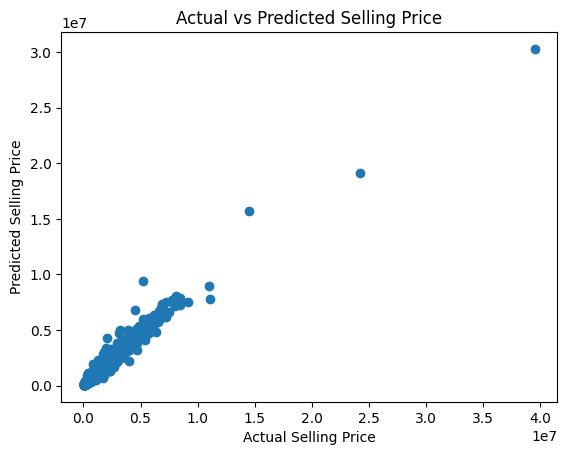

In [ ]:
plt.scatter(y_train, train_predictions)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

## **Predict Price from test data**

In [ ]:
X_test.head(1)

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
4259,12,73000,20.36,1197,78.9,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
import pandas as pd

input_data1 = pd.DataFrame(
    [
        [4, 20000, 18, 1490, 117.0, 5, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]
    ],
    columns=[
        'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
        'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
        'fuel_type_CNG', 'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_LPG', 'fuel_type_Petrol',
        'transmission_type_Automatic', 'transmission_type_Manual'
    ]
)

In [ ]:
price = model.predict(input_data1)
print("Predicted Price of used Car is: ", price)

Predicted Price of used Car is:  [1149860.]
